# Data Preparation
## Data Manipulation, Transformation and Cleaning

## Reshaping Data
A significant challenge with analytics is that the required data is rarely collected with a view to perform analytics.  It is mostly intended to support transaction processing, or managing operations. Data is often ‘dirty’, meaning data can be missing, duplicated, in the wrong formats, in different data sources/files, have character-set issues, require additional mappings, and so on.

Data analysts spend a great deal of time cleaning and preparing data for analysis.  In traditional business intelligence contexts, data cleaning and transformations are referred to as ETL processes (Extract-Transfer-Load).

Data scientists often set up defined ‘data pipelines’ – a series of data processing steps that ingest and bring data to a desired format and shape.  

During the rest of this chapter, we will see how we can select and filter data, understand data types, add and delete columns in tabular data, replace values, deal with missing values, and more.  We will do all of this primarily using _pandas_, and also a few other libraries.  

So what is it that we do when we reshape and clean data?  While of course this would almost always depend upon the data and what shape we are trying to get it to, there are several common actions that we have to perform that we should know about.  

 - **Select columns**: with a view to reducing the number of data fields we have to deal with by dropping the un-needed columns and retaining only the rest.

 - **Selecting rows**: filter out observations based on some criteria as to retain only the observations of relevance to us.

 - **Change data types**: Dates or numbers may be formatted as strings, or categories may appear as numbers.  We may need to change the data types to suit our needs.  

 - **Add columns**: We may need to insert new calculated columns, or bring in data from other data sources as additional features or columns to our dataset.  

 - **Reorder or sort columns and rows**: We may need to rearrange the columns and rows in our data to support understanding and presentation.

 - **Rename fields**: to remove spaces, special characters, or renaming them as to be more humanly readable.  
 
 - **Remove duplicates**: We may need to remove duplicate observations.

 - **Replace values**: Often we may have a need to change one value in the data for another, for example, replace United Kingdom with the letters UK.

 - **Bin numerical data**: We may need to convert numerical data to categories by grouping them into bins.  For example, we may like to call homes with 4 to 6 bedromms as 'Large', converting a numerical column to a binned category.

 - **Extract unique values**: to understand the data better.  

 - **Combine**: with other data sources as to enrich the information we already have.  

 - **Missing values**: We might like to fill in missing values for a more complete dataset, or remove data with missing values from our dataset.
 
 - **Summarize**: using groupby or pivot functions to summarize or 'elongate' the data as to make it more suitable for use in subsequent analysis.  (Also called melting and casting)  
 
 
In the end, we want to have the capability to twist and shape data in the way we need it for our analysis.  Python provides us tools and libraries that give us incredible flexibility in being able to do so.  

Missing values deserve a special mention.  We will also look at length on missing values, where we don't have all the data for every observation.  What are we to do in such a case?  Should we ignore the observations that are missing any data, and risk losing the data that we have, or try to compensate for the missing data using some smart thinking as to keep the available information?

In the rest of this discussion, we will cover some of these techniques.  This is of course not a complete list of everything a data analyst is able to do to reshape and reformat data, for such a list would be impossible.  Data manipulation is also closely related to feature engineering, which is discussed in a subsequent chapter.


Before we get started, we will create a random dataframe to play with.  



## The Setup
**Usual library imports**

In [148]:
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import os
from IPython.display import YouTubeVideo 

### Create a DataFrame
We start with creating a dataframe, which is akin to a spreadsheet.

There are many ways to create a dataframe.  When you read a datafile using pandas (for example, using `pd.read_csv`), a dataframe is automatically created.  

But sometimes you may not have a datafile, and you may need to create a dataframe using code.  The below examples describe several different ways of doing so.  The basic construct is `pd.DataFrame(data, index, columns)`.  `data` can be a list, or a dictionary, an array etc.  `index` refers to the names you want to give to the rows.  If you don't specify index, pandas will just number them starting with 0.  `columns` means the names of the columns that you want to see, and if you leave them blank, pandas will just use numbers starting with zero.

Some examples of creating a dataframe appear below.  You can modify them to your use case as required.  

In [149]:
# Here we create a dataframe from a dictionary.  First, we define a dictionary.
# Then we supply the dictionary as data to pd.DataFrame.

data = {'state': ['New York', 'Florida', 'Arizona'],
        'year': ['1999', '2000', '2001'],
        'pop': [100, 121, 132]}

In [150]:
#Check the data type

type(data)

dict

In [151]:
## Convert it to a dataframe

mydf = pd.DataFrame(data)
mydf

state  year  pop
0  New York  1999  100
1   Florida  2000  121
2   Arizona  2001  132

In [152]:
## or another way...

df = pd.DataFrame(np.random.randint(0,100,size=(100, 4)), columns=list('ABCD'))
df

A   B   C   D
0   18  77  77  88
1   90  83  39  98
2   15  37  96  36
3   98   1  32  30
4    7  50  50  32
..  ..  ..  ..  ..
95  13  11  42  10
96  88  24  47  68
97  43  91  13   6
98   2  67  93   4
99  28  35  82  77

[100 rows x 4 columns]

**Multiple ways to create the same dataframe**  

Imagine we have the population of the five boroughs of New York in 2020 as follows:

| Borough | Population
| --- | ---|
| BRONX | 1446788 |
| BROOKLYN | 2648452 |
| MANHATTAN | 1638281 |
| QUEENS | 2330295 |
| STATEN ISLAND | 487155 |

We want this information as a dataframe so we can join it with other information we might have on the boroughs.

Try to create a dataframe from the above data.  Several ways to do so listed below.  


In [153]:
# See here that we are specifying the index
pop = pd.DataFrame(data = [1446788, 2648452, 1638281, 2330295, 487155], 
             index = ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'], 
             columns = ['population'])

pop

population
BRONX             1446788
BROOKLYN          2648452
MANHATTAN         1638281
QUEENS            2330295
STATEN ISLAND      487155

In [154]:
# Same thing, but here we keep the borough name as a column
pop = pd.DataFrame(data = {'population': [1446788, 2648452, 1638281, 2330295, 487155], 
             'BOROUGH': ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND']},) 

pop

population        BOROUGH
0     1446788          BRONX
1     2648452       BROOKLYN
2     1638281      MANHATTAN
3     2330295         QUEENS
4      487155  STATEN ISLAND

In [155]:
# Yet another way of creating the same dataframe

pop = pd.DataFrame({'population': {'BRONX': 1446788,
  'BROOKLYN': 2648452,
  'MANHATTAN': 1638281,
  'QUEENS': 2330295,
  'STATEN ISLAND': 487155}})
pop

population
BRONX             1446788
BROOKLYN          2648452
MANHATTAN         1638281
QUEENS            2330295
STATEN ISLAND      487155

In [156]:
# Same thing as earlier, but with borough name in the index
pop = pd.DataFrame({'population': [1446788, 2648452, 1638281, 2330295, 487155]}, 
                   index = ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'],)
pop

population
BRONX             1446788
BROOKLYN          2648452
MANHATTAN         1638281
QUEENS            2330295
STATEN ISLAND      487155

In [157]:
## Get the current working directory

os.getcwd()

'C:\\Users\\user\\Google Drive\\jupyter'

### Read the diamonds and mtcars dataframes

The ‘diamonds’ has 50k+ records, each representing a single diamond.  The weight and other attributes are available, and so is the price.

The dataset allows us to experiment with a variety of prediction techniques and algorithms.  Below are the columns in the dataset, and their description.

| Col | Description |
| --- | --- |
| price | price in US dollars (\\$326--\\$18,823) |
| carat | weight of the diamond (0.2--5.01) |
| cut | quality of the cut (Fair, Good, Very Good, Premium, Ideal) |
| color | diamond colour, from J (worst) to D (best) |
| clarity | a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) |
| x | length in mm (0--10.74) |
| y | width in mm (0--58.9) |
| z | depth in mm (0--31.8) |
| depth | total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79) |
| table | width of top of diamond relative to widest point (43--95) |


In [158]:
diamonds = sns.load_dataset("diamonds")

**We also load the mtcars dataset**    

_Description_  
The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

_Format_  
A data frame with 32 observations on 11 (numeric) variables.
```
[, 1]	mpg 	Miles/(US) gallon
[, 2]	cyl 	Number of cylinders
[, 3]	disp	Displacement (cu.in.)
[, 4]	hp  	Gross horsepower
[, 5]	drat	Rear axle ratio
[, 6]	wt  	Weight (1000 lbs)
[, 7]	qsec	1/4 mile time
[, 8]	vs  	Engine (0 = V-shaped, 1 = straight)
[, 9]	am  	Transmission (0 = automatic, 1 = manual)
[,10]	gear	Number of forward gears
[,11]	carb	Number of carburetors
```

_Source: https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html_

In [159]:
# Load the dataset

mtcars = sm.datasets.get_rdataset('mtcars').data

In [160]:
mtcars.head()

mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
rownames                                                                     
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
rownames                 
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2

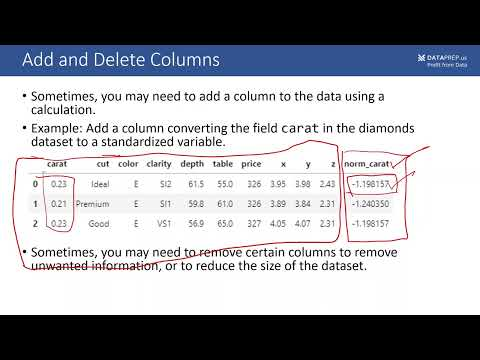

In [161]:
YouTubeVideo('X_X3mc1a2oY', width=672, height=378)

## Selecting columns

Datasets may sometimes have hundreds of columns, or features.  Many features may be redundant, or unrelated to our analytical needs.  Many columns may have too many null values to be of practical use.

Several ways to select columns with Pandas:  
- Select a single column with: `df['column_name']`
- Or multiple columns using: `df[['col1', 'col2', 'col3’]]`
- Or look for a string in a column name `df[col for col in df.columns if 'string' in col]`
- Or select based on column positions with `df.iloc[:, 2:3]` etc.

In [162]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [163]:
diamonds[['carat', 'price', 'color']]

carat  price color
0       0.23    326     E
1       0.21    326     E
2       0.23    327     E
3       0.29    334     I
4       0.31    335     J
...      ...    ...   ...
53935   0.72   2757     D
53936   0.72   2757     D
53937   0.70   2757     D
53938   0.86   2757     H
53939   0.75   2757     D

[53940 rows x 3 columns]

In [164]:
mtcars[['mpg', 'cyl', 'disp', 'hp', 'wt']]

mpg  cyl   disp   hp     wt
rownames                                         
Mazda RX4            21.0    6  160.0  110  2.620
Mazda RX4 Wag        21.0    6  160.0  110  2.875
Datsun 710           22.8    4  108.0   93  2.320
Hornet 4 Drive       21.4    6  258.0  110  3.215
Hornet Sportabout    18.7    8  360.0  175  3.440
Valiant              18.1    6  225.0  105  3.460
Duster 360           14.3    8  360.0  245  3.570
Merc 240D            24.4    4  146.7   62  3.190
Merc 230             22.8    4  140.8   95  3.150
Merc 280             19.2    6  167.6  123  3.440
Merc 280C            17.8    6  167.6  123  3.440
Merc 450SE           16.4    8  275.8  180  4.070
Merc 450SL           17.3    8  275.8  180  3.730
Merc 450SLC          15.2    8  275.8  180  3.780
Cadillac Fleetwood   10.4    8  472.0  205  5.250
Lincoln Continental  10.4    8  460.0  215  5.424
Chrysler Imperial    14.7    8  440.0  230  5.345
Fiat 128             32.4    4   78.7   66  2.200
Honda Civic          30.4    4   75.7   52  1.615
Toyota Corolla       33.9    4   71.1   65  1.835
Toyota Corona        21.5    4  120.1   97  2.465
Dodge Challenger     15.5    8  318.0  150  3.520
AMC Javelin          15.2    8  304.0  150  3.435
Camaro Z28           13.3    8  350.0  245  3.840
Pontiac Firebird     19.2    8  400.0  175  3.845
Fiat X1-9            27.3    4   79.0   66  1.935
Porsche 914-2        26.0    4  120.3   91  2.140
Lotus Europa         30.4    4   95.1  113  1.513
Ford Pantera L       15.8    8  351.0  264  3.170
Ferrari Dino         19.7    6  145.0  175  2.770
Maserati Bora        15.0    8  301.0  335  3.570
Volvo 142E           21.4    4  121.0  109  2.780

## Select rows (queries)

Row selection is generally more complex, as we need to apply conditions to only select certain rows.
Multiple conditions can be applied simultaneously.

Two approaches in Pandas:
- The more reliable but verbose method: `df[(df.Col1 == 1) & (df.col2 == 6)]`. This method allows greater flexibility, particularly when doing string searches inside rows.
- Use `.query`:  `df.query('conditions separated by & or |')`.  This method works for most common situations, and the query is easier to construct
- Use `!=` for not-equal-to


In [165]:
diamonds.query('carat > 3 & cut == "Premium"')

carat      cut color clarity  depth  table  price      x      y     z
19339   3.01  Premium     I      I1   62.7   58.0   8040   9.10   8.97  5.67
21862   3.01  Premium     F      I1   62.2   56.0   9925   9.24   9.13  5.73
22428   3.05  Premium     E      I1   60.9   58.0  10453   9.26   9.25  5.66
24131   3.24  Premium     H      I1   62.1   58.0  12300   9.44   9.40  5.85
25460   3.01  Premium     G     SI2   59.8   58.0  14220   9.44   9.37  5.62
25998   4.01  Premium     I      I1   61.0   61.0  15223  10.14  10.10  6.17
25999   4.01  Premium     J      I1   62.5   62.0  15223  10.02   9.94  6.24
26534   3.67  Premium     I      I1   62.4   56.0  16193   9.86   9.81  6.13
27514   3.01  Premium     I     SI2   60.2   59.0  18242   9.36   9.31  5.62
27638   3.04  Premium     I     SI2   59.3   60.0  18559   9.51   9.46  5.62
27679   3.51  Premium     J     VS2   62.5   59.0  18701   9.66   9.63  6.03
27684   3.01  Premium     J     SI2   60.7   59.0  18710   9.35   9.22  5.64
27685   3.01  Premium     J     SI2   59.7   58.0  18710   9.41   9.32  5.59

In [166]:
## You can combine the column selection and the row filter.:

diamonds[['carat', 'cut']].query('carat > 3').head()

carat      cut
19339   3.01  Premium
21758   3.11     Fair
21862   3.01  Premium
22428   3.05  Premium
22540   3.02     Fair

In [167]:
## Perform some queries on the data.
## The following query applies multiple conditions 
## simultaneously to give us the observations 
## we are interested in.


diamonds.query('cut == "Good" \
               and color =="E" and clarity =="VVS2" \
               and price > 10000')


carat   cut color clarity  depth  table  price     x     y     z
24630   1.30  Good     E    VVS2   62.8   59.0  12967  6.95  6.99  4.38
25828   1.41  Good     E    VVS2   59.9   61.0  14853  7.21  7.37  4.37
27177   1.50  Good     E    VVS2   64.3   58.0  17449  7.20  7.13  4.61

In [168]:
## Same query using the more verbose method

diamonds[(diamonds["cut"] == "Good") 
         & (diamonds["color"] == "E") & (diamonds["clarity"] == "VVS2") 
         & (diamonds["price"] > 10000)]

carat   cut color clarity  depth  table  price     x     y     z
24630   1.30  Good     E    VVS2   62.8   59.0  12967  6.95  6.99  4.38
25828   1.41  Good     E    VVS2   59.9   61.0  14853  7.21  7.37  4.37
27177   1.50  Good     E    VVS2   64.3   58.0  17449  7.20  7.13  4.61

In [169]:
## Query using string searches

diamonds[(diamonds["cut"] == "Good") & (diamonds["clarity"].str.startswith("V"))]

carat   cut color clarity  depth  table  price     x     y     z
2       0.23  Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
35      0.23  Good     F     VS1   58.2   59.0    402  4.06  4.08  2.37
36      0.23  Good     E     VS1   64.1   59.0    402  3.83  3.85  2.46
42      0.26  Good     D     VS2   65.2   56.0    403  3.99  4.02  2.61
43      0.26  Good     D     VS1   58.4   63.0    403  4.19  4.24  2.46
...      ...   ...   ...     ...    ...    ...    ...   ...   ...   ...
53840   0.71  Good     H    VVS2   60.4   63.0   2738  5.69  5.74  3.45
53886   0.70  Good     D     VS2   58.0   62.0   2749  5.78  5.87  3.38
53895   0.70  Good     F     VS1   57.8   61.0   2751  5.83  5.79  3.36
53913   0.80  Good     G     VS2   64.2   58.0   2753  5.84  5.81  3.74
53914   0.84  Good     I     VS1   63.7   59.0   2753  5.94  5.90  3.77

[2098 rows x 10 columns]

In [170]:
## Another example

diamonds.query('cut == "Good" \
and color == "E" and clarity == "VVS2" \
and price > 10000')

carat   cut color clarity  depth  table  price     x     y     z
24630   1.30  Good     E    VVS2   62.8   59.0  12967  6.95  6.99  4.38
25828   1.41  Good     E    VVS2   59.9   61.0  14853  7.21  7.37  4.37
27177   1.50  Good     E    VVS2   64.3   58.0  17449  7.20  7.13  4.61

In [171]:
## Another example

diamonds[(diamonds['cut'] == 'Good') 
       & (diamonds['color'] == 'E')
         & (diamonds['clarity'] == 'VVS2')
           & (diamonds['price'] >10000)]

carat   cut color clarity  depth  table  price     x     y     z
24630   1.30  Good     E    VVS2   62.8   59.0  12967  6.95  6.99  4.38
25828   1.41  Good     E    VVS2   59.9   61.0  14853  7.21  7.37  4.37
27177   1.50  Good     E    VVS2   64.3   58.0  17449  7.20  7.13  4.61

## Subsetting with `loc` and `iloc` 
**- subsetting a data frame** <br>
`loc` is label based, ie based on the row index and column names <br>
`iloc` is row and column number based <br>

Separate the row and column selections by commas.  If no comma, then the entire entry is assumed to be for the rows.



In [172]:
diamonds.iloc[:3] ## only for iloc, the range excludes the right hand number.  Here the row with index 3 is excluded.

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31

In [173]:
diamonds.iloc[1,2]

'E'

In [174]:
diamonds.loc[1,'cut']

'Premium'

In [175]:
diamonds.loc[1:3, ['cut','depth']] ## Note here you need the square brackets, in the next one you don't

cut  depth
1  Premium   59.8
2     Good   56.9
3  Premium   62.4

In [176]:
diamonds[1:3]

carat      cut color clarity  depth  table  price     x     y     z
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31

In [177]:
diamonds.loc[1:3, 'cut':'depth']

cut color clarity  depth
1  Premium     E     SI1   59.8
2     Good     E     VS1   56.9
3  Premium     I     VS2   62.4

In [178]:
diamonds.iloc[1:3,2:4] #See the rows and columns that were excluded

color clarity
1     E     SI1
2     E     VS1

## Understanding Data Types

A ‘data type’ is an internal representation of how Python treats and manipulates data.
Python and Pandas can be quite forgiving about data types, but incorrect data types can give you incorrect or unpredictable results, or outright errors.
Following are the data types used in Pandas:

| Pandas data type | Notes |
| --- | --- |
| bool | True/False values |
| category | Levels, or factors, ie, a determinate list of categorical values |
| datetime64 | Date & time representations |
| float64 | Floating point numbers (ie numbers with decimals) |
| int64 | Integers |
| object | Text, or mixed numeric and non-numeric values |
| timedelta[ns] | Difference between two datetimes |

Consider the `mtcars` dataset.

Examining the data types of different columns, we see that cyl (number of cylinders) is an integer.
But this feature has only three discrete values, and can be considered a category.

We can convert this column to a category.

Dates often require a similar consideration


In [179]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


## Change column to categorical 



In [180]:
x = diamonds[['carat', 'cut']].query('carat > 3')
x.info()


<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 19339 to 27685
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   carat   32 non-null     float64 
 1   cut     32 non-null     category
dtypes: category(1), float64(1)
memory usage: 756.0 bytes


In [181]:
diamonds['cut'] = diamonds['cut'].astype('category')
diamonds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [182]:
diamonds['cut'].cat.categories

Index(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype='object')

### How to list categories 

In [183]:
list(enumerate(diamonds['cut'].cat.categories))

[(0, 'Ideal'), (1, 'Premium'), (2, 'Very Good'), (3, 'Good'), (4, 'Fair')]

In [184]:
 dict(enumerate(diamonds['cut'].cat.categories))

{0: 'Ideal', 1: 'Premium', 2: 'Very Good', 3: 'Good', 4: 'Fair'}

In [185]:
pd.DataFrame(enumerate(diamonds['cut'].cat.categories))

0          1
0  0      Ideal
1  1    Premium
2  2  Very Good
3  3       Good
4  4       Fair

In [186]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


In [187]:
mtcars['cyl'] = mtcars['cyl'].astype('category')

In [188]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   mpg     32 non-null     float64 
 1   cyl     32 non-null     category
 2   disp    32 non-null     float64 
 3   hp      32 non-null     int64   
 4   drat    32 non-null     float64 
 5   wt      32 non-null     float64 
 6   qsec    32 non-null     float64 
 7   vs      32 non-null     int64   
 8   am      32 non-null     int64   
 9   gear    32 non-null     int64   
 10  carb    32 non-null     int64   
dtypes: category(1), float64(5), int64(5)
memory usage: 2.9+ KB


## Get column names
You can list columns using `df.columns`


In [189]:
# List the column names in the diamonds dataset

diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [190]:
## Or, list it for a cleaner list

list(diamonds.columns)

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

In [191]:
diamonds.columns.tolist()
## same thing as above

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

## Add Columns

Sometimes, you may need to add a column to the data using a calculation.

Example: Add a column `norm_carat` converting the field carat in the diamonds dataset to a standardized variable.

In [192]:
## Add a column equal to the z-score for the carat variable
diamonds['norm_carat'] = (diamonds['carat'] - diamonds['carat'].mean() )/diamonds['carat'].std()
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

   norm_carat  
0   -1.198157  
1   -1.240350  
2   -1.198157  
3   -1.071577  
4   -1.029384

### Add column with `insert`

Use `df.insert(col_location, col_title, contents)` to insert at a particular location.

Below we insert a random number at position 3 in the diamonds dataframe.


In [193]:
## mydf.insert(col_location, col_title, contents) does the trick

diamonds.insert(3, "random_value", np.random.randint(0, 100, diamonds.shape[0]))
diamonds.head()

carat      cut color  random_value clarity  depth  table  price     x  \
0   0.23    Ideal     E            46     SI2   61.5   55.0    326  3.95   
1   0.21  Premium     E            78     SI1   59.8   61.0    326  3.89   
2   0.23     Good     E             6     VS1   56.9   65.0    327  4.05   
3   0.29  Premium     I            91     VS2   62.4   58.0    334  4.20   
4   0.31     Good     J            80     SI2   63.3   58.0    335  4.34   

      y     z  norm_carat  
0  3.98  2.43   -1.198157  
1  3.84  2.31   -1.240350  
2  4.07  2.31   -1.198157  
3  4.23  2.63   -1.071577  
4  4.35  2.75   -1.029384

### Add column with `assign`


In [194]:
## This does not add the column to the original data frame unless you make it equal to the new one

diamonds.assign(total = diamonds.x + diamonds.y + diamonds.z).head()


carat      cut color  random_value clarity  depth  table  price     x  \
0   0.23    Ideal     E            46     SI2   61.5   55.0    326  3.95   
1   0.21  Premium     E            78     SI1   59.8   61.0    326  3.89   
2   0.23     Good     E             6     VS1   56.9   65.0    327  4.05   
3   0.29  Premium     I            91     VS2   62.4   58.0    334  4.20   
4   0.31     Good     J            80     SI2   63.3   58.0    335  4.34   

      y     z  norm_carat  total  
0  3.98  2.43   -1.198157  10.36  
1  3.84  2.31   -1.240350  10.04  
2  4.07  2.31   -1.198157  10.43  
3  4.23  2.63   -1.071577  11.06  
4  4.35  2.75   -1.029384  11.44

In [195]:
## Notice the 'total' column from above is not there, .

diamonds.head(2)


carat      cut color  random_value clarity  depth  table  price     x  \
0   0.23    Ideal     E            46     SI2   61.5   55.0    326  3.95   
1   0.21  Premium     E            78     SI1   59.8   61.0    326  3.89   

      y     z  norm_carat  
0  3.98  2.43   -1.198157  
1  3.84  2.31   -1.240350

## Delete Columns

Sometimes, you may need to remove certain columns to remove unwanted information, or to reduce the size of the dataset.

`del df['ColName']` does the trick for a single column.

Similarly, `df.drop(['ColName'], axis = 1, inplace = True)` can be used to delete multiple columns.  It can also be used to delete rows.  


In [196]:
diamonds

carat        cut color  random_value clarity  depth  table  price  \
0       0.23      Ideal     E            46     SI2   61.5   55.0    326   
1       0.21    Premium     E            78     SI1   59.8   61.0    326   
2       0.23       Good     E             6     VS1   56.9   65.0    327   
3       0.29    Premium     I            91     VS2   62.4   58.0    334   
4       0.31       Good     J            80     SI2   63.3   58.0    335   
...      ...        ...   ...           ...     ...    ...    ...    ...   
53935   0.72      Ideal     D            46     SI1   60.8   57.0   2757   
53936   0.72       Good     D            59     SI1   63.1   55.0   2757   
53937   0.70  Very Good     D            90     SI1   62.8   60.0   2757   
53938   0.86    Premium     H            27     SI2   61.0   58.0   2757   
53939   0.75      Ideal     D            89     SI2   62.2   55.0   2757   

          x     y     z  norm_carat  
0      3.95  3.98  2.43   -1.198157  
1      3.89  3.84  2.31   -1.240350  
2      4.05  4.07  2.31   -1.198157  
3      4.20  4.23  2.63   -1.071577  
4      4.34  4.35  2.75   -1.029384  
...     ...   ...   ...         ...  
53935  5.75  5.76  3.50   -0.164426  
53936  5.69  5.75  3.61   -0.164426  
53937  5.66  5.68  3.56   -0.206619  
53938  6.15  6.12  3.74    0.130926  
53939  5.83  5.87  3.64   -0.101136  

[53940 rows x 12 columns]

In [197]:
# Example: delete the 'norm_carat' column we inserted earlier

del diamonds['norm_carat']

In [198]:
## Or we can use the drop command

diamonds.drop('random_value', axis=1, inplace=True)

In [199]:
# Let us now look a the list of columns that are left

diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

## Reordering Columns

Sometimes you may need to rearrange the order in which columns appear to make them easier to read.
In Pandas, that can be done by assigning the new column order to the same dataframe.

Example: Make price the first column in the diamonds dataset.


In [200]:
diamonds

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

In [201]:
diamonds = diamonds[['price', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',  'x', 'y','z']]

In [202]:
diamonds

price  carat        cut color clarity  depth  table     x     y     z
0        326   0.23      Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43
1        326   0.21    Premium     E     SI1   59.8   61.0  3.89  3.84  2.31
2        327   0.23       Good     E     VS1   56.9   65.0  4.05  4.07  2.31
3        334   0.29    Premium     I     VS2   62.4   58.0  4.20  4.23  2.63
4        335   0.31       Good     J     SI2   63.3   58.0  4.34  4.35  2.75
...      ...    ...        ...   ...     ...    ...    ...   ...   ...   ...
53935   2757   0.72      Ideal     D     SI1   60.8   57.0  5.75  5.76  3.50
53936   2757   0.72       Good     D     SI1   63.1   55.0  5.69  5.75  3.61
53937   2757   0.70  Very Good     D     SI1   62.8   60.0  5.66  5.68  3.56
53938   2757   0.86    Premium     H     SI2   61.0   58.0  6.15  6.12  3.74
53939   2757   0.75      Ideal     D     SI2   62.2   55.0  5.83  5.87  3.64

[53940 rows x 10 columns]

## Sorting Values
Sorting rows by their values is a common task.

Example: Sort the diamonds dataset by price and carat weight so that the former is sorted in ascending order, and the latter in ascending order.


Format is `df.sort_values(['a', 'b'], ascending=[True, False])`

In [203]:
diamonds.sort_values(['carat', 'price', 'depth'], ascending = [False, False, False]).head(8)

price  carat        cut color clarity  depth  table      x      y     z
27415  18018   5.01       Fair     J      I1   65.5   59.0  10.74  10.54  6.98
27630  18531   4.50       Fair     J      I1   65.8   58.0  10.23  10.16  6.72
27130  17329   4.13       Fair     H      I1   64.8   61.0  10.00   9.85  6.43
25999  15223   4.01    Premium     J      I1   62.5   62.0  10.02   9.94  6.24
25998  15223   4.01    Premium     I      I1   61.0   61.0  10.14  10.10  6.17
26444  15984   4.00  Very Good     I      I1   63.3   58.0  10.01   9.94  6.31
26534  16193   3.67    Premium     I      I1   62.4   56.0   9.86   9.81  6.13
23644  11668   3.65       Fair     H      I1   67.1   53.0   9.53   9.48  6.38

In [204]:
# Another example of sorting, but with the change updating the dataframe through 'inplace=True'

diamonds.sort_values(['price', 'carat'], ascending=[True, False], inplace = True)

In [205]:
# Let us look at how the sorted dataset looks like

diamonds

price  carat        cut color clarity  depth  table     x     y     z
0        326   0.23      Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43
1        326   0.21    Premium     E     SI1   59.8   61.0  3.89  3.84  2.31
2        327   0.23       Good     E     VS1   56.9   65.0  4.05  4.07  2.31
3        334   0.29    Premium     I     VS2   62.4   58.0  4.20  4.23  2.63
4        335   0.31       Good     J     SI2   63.3   58.0  4.34  4.35  2.75
...      ...    ...        ...   ...     ...    ...    ...   ...   ...   ...
27745  18803   2.00  Very Good     H     SI1   62.8   57.0  7.95  8.00  5.01
27746  18804   2.07      Ideal     G     SI2   62.5   55.0  8.20  8.13  5.11
27747  18806   1.51      Ideal     G      IF   61.7   55.0  7.37  7.41  4.56
27748  18818   2.00  Very Good     G     SI1   63.5   56.0  7.90  7.97  5.04
27749  18823   2.29    Premium     I     VS2   60.8   60.0  8.50  8.47  5.16

[53940 rows x 10 columns]

## Renaming Columns

Renaming columns is often needed to remove spaces in column names, or make everything lowercase, or to provide more descriptive or concise column headings.

Can be done by passing a dictionary of old_name: new_name to the rename function.

Example: Rename price to dollars, and carat to weight in the diamonds dataset.
```Python
df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
```

In [206]:
diamonds.rename(columns = {'price': 'dollars', 'carat': 'weight'})

dollars  weight        cut color clarity  depth  table     x     y  \
0          326    0.23      Ideal     E     SI2   61.5   55.0  3.95  3.98   
1          326    0.21    Premium     E     SI1   59.8   61.0  3.89  3.84   
2          327    0.23       Good     E     VS1   56.9   65.0  4.05  4.07   
3          334    0.29    Premium     I     VS2   62.4   58.0  4.20  4.23   
4          335    0.31       Good     J     SI2   63.3   58.0  4.34  4.35   
...        ...     ...        ...   ...     ...    ...    ...   ...   ...   
27745    18803    2.00  Very Good     H     SI1   62.8   57.0  7.95  8.00   
27746    18804    2.07      Ideal     G     SI2   62.5   55.0  8.20  8.13   
27747    18806    1.51      Ideal     G      IF   61.7   55.0  7.37  7.41   
27748    18818    2.00  Very Good     G     SI1   63.5   56.0  7.90  7.97   
27749    18823    2.29    Premium     I     VS2   60.8   60.0  8.50  8.47   

          z  
0      2.43  
1      2.31  
2      2.31  
3      2.63  
4      2.75  
...     ...  
27745  5.01  
27746  5.11  
27747  4.56  
27748  5.04  
27749  5.16  

[53940 rows x 10 columns]

In [207]:
diamonds.rename(columns={'price': 'dollars'}, inplace=False)

dollars  carat        cut color clarity  depth  table     x     y     z
0          326   0.23      Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43
1          326   0.21    Premium     E     SI1   59.8   61.0  3.89  3.84  2.31
2          327   0.23       Good     E     VS1   56.9   65.0  4.05  4.07  2.31
3          334   0.29    Premium     I     VS2   62.4   58.0  4.20  4.23  2.63
4          335   0.31       Good     J     SI2   63.3   58.0  4.34  4.35  2.75
...        ...    ...        ...   ...     ...    ...    ...   ...   ...   ...
27745    18803   2.00  Very Good     H     SI1   62.8   57.0  7.95  8.00  5.01
27746    18804   2.07      Ideal     G     SI2   62.5   55.0  8.20  8.13  5.11
27747    18806   1.51      Ideal     G      IF   61.7   55.0  7.37  7.41  4.56
27748    18818   2.00  Very Good     G     SI1   63.5   56.0  7.90  7.97  5.04
27749    18823   2.29    Premium     I     VS2   60.8   60.0  8.50  8.47  5.16

[53940 rows x 10 columns]

## Removing Duplicates  
Duplicate rows may often be found in a DataFrame.

`pandas.drop_duplicates()` returns a DataFrame where all duplicated rows are removed.

By default, all columns are considered, but you can limit the duplication detection to a subset of columns.  If a subset of columns is used, the first observed value will be retained.  This behavior can be changed by specifying `keep = 'last'.`

Let us consider an example. We create a toy dataframe as below:



In [208]:
df = pd.DataFrame({'state': ['NY', 'NJ', 'NJ', 'NJ', 'CT', 'CT', 'CT'],
                  'variable1': [2, 3, 2, 2, 4, 6, 6],
                  'variable2': [10, 22, 22, 24, 11, 24, 24]})
df

state  variable1  variable2
0    NY          2         10
1    NJ          3         22
2    NJ          2         22
3    NJ          2         24
4    CT          4         11
5    CT          6         24
6    CT          6         24

Note the below:

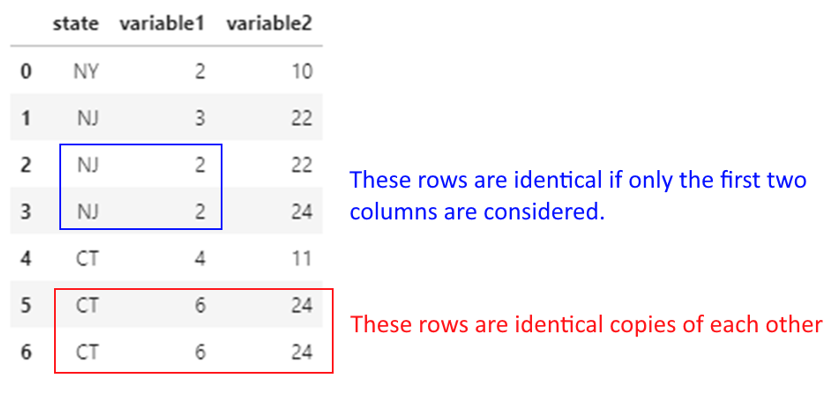

In [209]:
## Dropping duplicates considering all columns

df.drop_duplicates()

state  variable1  variable2
0    NY          2         10
1    NJ          3         22
2    NJ          2         22
3    NJ          2         24
4    CT          4         11
5    CT          6         24

In [210]:
## Dropping duplicates considering only the first two columns.

## (Note which of the two NJ records was retained!)

df.drop_duplicates(['state', 'variable1'], keep='first')

state  variable1  variable2
0    NY          2         10
1    NJ          3         22
2    NJ          2         22
4    CT          4         11
5    CT          6         24

## Replacing Values

We often need to replace values in data.  For example, we may know that 0 means the data is not available, and may wish to replace zeros with NaN.  

Let us replace state names in our previous toy dataset with their full names.

We do this using `df.replace({'NJ': 'New Jersey', 'NY': 'New York', 'CT': 'Connecticut’})`.

Note that this affects the entire dataframe, so be careful to select the right column name if you want the replacement to occur in only one column!


In [211]:
df.replace({'NJ': 'New Jersey', 'NY': 'New York', 'CT': 'Connecticut'})

state  variable1  variable2
0     New York          2         10
1   New Jersey          3         22
2   New Jersey          2         22
3   New Jersey          2         24
4  Connecticut          4         11
5  Connecticut          6         24
6  Connecticut          6         24

## Binning using Pandas `cut` Function

We often need to convert continuous variables into categories.

For example, reconsider our toy dataset.  Consider variable1.  Say we want anything 2 or lower to be labeled as Small, 2 to 4 as Medium, and 4 to 6 as Large.

We can do this as follows:
`pd.cut(df.variable1, [0, 2, 4, 6], labels = ["Small", "Medium", "Large"])`


Consider `variable1`.  Say we want anything 2 or lower to be labeled as Small,
2 to 4 as Medium, and 4 to 6 as Large.

We use the `pd.cut` function to create the bins, and assign them labels as below. 

If no labels are specified, the mathematical notation for intervals will be used for the bins, ie ```[(0, 2] < (2, 4] < (4, 6]]``` ( `(` means does not include, and `[` means includes)


In [212]:
df['NewColumn'] = pd.cut(df.variable1, [0, 2, 4, 6], labels = ["Small", "Medium", "Large"])
df

state  variable1  variable2 NewColumn
0    NY          2         10     Small
1    NJ          3         22    Medium
2    NJ          2         22     Small
3    NJ          2         24     Small
4    CT          4         11    Medium
5    CT          6         24     Large
6    CT          6         24     Large

In [213]:
df

state  variable1  variable2 NewColumn
0    NY          2         10     Small
1    NJ          3         22    Medium
2    NJ          2         22     Small
3    NJ          2         24     Small
4    CT          4         11    Medium
5    CT          6         24     Large
6    CT          6         24     Large

In [214]:
df['NewColumn'] = pd.cut(df.variable1, [0, 2, 4, 6])
df

state  variable1  variable2 NewColumn
0    NY          2         10    (0, 2]
1    NJ          3         22    (2, 4]
2    NJ          2         22    (0, 2]
3    NJ          2         24    (0, 2]
4    CT          4         11    (2, 4]
5    CT          6         24    (4, 6]
6    CT          6         24    (4, 6]

## Binning into Quantiles using `qcut`

Sometimes we may desire an equal number of observations in our bins.

In such cases, we can use quantiles as bins but then the intervals may not be equal (though the count of observations in each bin may be similar.

We can also specify arbitrary quantiles as bins.

In Pandas, use `pd.qcut(df.variable1, number_of_quantiles)` to achieve this.


In [215]:
pd.qcut(df.variable1, 2)

0    (1.999, 3.0]
1    (1.999, 3.0]
2    (1.999, 3.0]
3    (1.999, 3.0]
4      (3.0, 6.0]
5      (3.0, 6.0]
6      (3.0, 6.0]
Name: variable1, dtype: category
Categories (2, interval[float64, right]): [(1.999, 3.0] < (3.0, 6.0]]

In [216]:
pd.qcut(diamonds.price, 4)

0          (325.999, 950.0]
1          (325.999, 950.0]
2          (325.999, 950.0]
3          (325.999, 950.0]
4          (325.999, 950.0]
                ...        
27745    (5324.25, 18823.0]
27746    (5324.25, 18823.0]
27747    (5324.25, 18823.0]
27748    (5324.25, 18823.0]
27749    (5324.25, 18823.0]
Name: price, Length: 53940, dtype: category
Categories (4, interval[float64, right]): [(325.999, 950.0] < (950.0, 2401.0] < (2401.0, 5324.25] < (5324.25, 18823.0]]

In [217]:
diamonds['quartiles']=pd.qcut(diamonds.price, 4)
diamonds['Price_Category']=pd.qcut(diamonds.price, 4, labels=['Economy','Affordable','Pricey','Expensive'])
diamonds.sample(8)

price  carat        cut color clarity  depth  table     x     y     z  \
44636   1608   0.58  Very Good     E     VS2   60.3   57.0  5.41  5.44  3.27   
27231  17597   1.70       Good     F     VS2   62.2   56.0  7.54  7.60  4.71   
53017   2599   0.71       Good     G     VS2   64.2   58.0  5.59  5.62  3.60   
29881    710   0.30  Very Good     D     VS2   60.3   60.0  4.28  4.31  2.59   
43150   1389   0.58      Ideal     H     SI1   61.9   59.0  5.33  5.36  3.31   
207     2778   0.52      Ideal     F    VVS1   61.3   55.0  5.19  5.22  3.19   
15893   6354   1.01  Very Good     G    VVS2   61.3   61.0  6.32  6.47  3.92   
29260    698   0.31    Premium     G     VS2   59.0   60.0  4.41  4.37  2.59   

                quartiles Price_Category  
44636     (950.0, 2401.0]     Affordable  
27231  (5324.25, 18823.0]      Expensive  
53017   (2401.0, 5324.25]         Pricey  
29881    (325.999, 950.0]        Economy  
43150     (950.0, 2401.0]     Affordable  
207     (2401.0, 5324.25]         Pricey  
15893  (5324.25, 18823.0]      Expensive  
29260    (325.999, 950.0]        Economy

In [218]:
# ..combining pandas functions to get a list of the unique quartiles and price_category columns

diamonds[['quartiles', 'Price_Category']].drop_duplicates().sort_values(by='quartiles').reset_index()

index           quartiles Price_Category
0      0    (325.999, 950.0]        Economy
1  36691     (950.0, 2401.0]     Affordable
2  51735   (2401.0, 5324.25]         Pricey
3  12766  (5324.25, 18823.0]      Expensive

In [219]:
# ..looking at counts in each category
diamonds.groupby(['quartiles', 'Price_Category']).agg({"carat":"count"}).query('carat>0').rename({'carat':'Count of Diamonds'}, axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_17676\3774040384.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diamonds.groupby(['quartiles', 'Price_Category']).agg({"carat":"count"}).query('carat>0').rename({'carat':'Count of Diamonds'}, axis=1)


Count of Diamonds
quartiles          Price_Category                   
(325.999, 950.0]   Economy                     13490
(950.0, 2401.0]    Affordable                  13495
(2401.0, 5324.25]  Pricey                      13470
(5324.25, 18823.0] Expensive                   13485

## Select a random sample of data
Often, we need to look at a sample of the observations.  `df.head()` and `df.tail()` produce the same records each time, and often it is good to look at other data.

`df.sample(n)` gives you a random set of _n_ observations from the data.


In [220]:
## Either a discrete number of rows,
diamonds.sample(3)

price  carat      cut color clarity  depth  table     x     y     z  \
14773   5946   1.01  Premium     G     VS2   59.0   61.0  6.62  6.56  3.89   
14642   5913   1.20     Good     D     SI1   63.5   55.0  6.70  6.78  4.28   
48244   1951   0.56     Good     E     VS1   59.8   61.0  5.35  5.36  3.20   

                quartiles Price_Category  
14773  (5324.25, 18823.0]      Expensive  
14642  (5324.25, 18823.0]      Expensive  
48244     (950.0, 2401.0]     Affordable

In [221]:
## or a fraction of the total data
diamonds.sample(frac = 0.00015)

price  carat        cut color clarity  depth  table     x     y     z  \
38486   1031   0.42      Ideal     F     VS1   61.4   57.0  4.78  4.83  2.95   
23687  11746   1.51       Good     G     VS2   64.2   54.0  7.27  7.18  4.64   
45832   1713   0.54      Ideal     E     VS2   62.8   55.0  5.21  5.24  3.28   
3947    3502   0.80    Premium     F     VS2   62.1   60.0  5.92  5.86  3.66   
14828   5973   1.01  Very Good     E     SI1   63.1   57.0  6.40  6.37  4.03   
25001  13530   1.52    Premium     F     VS2   59.4   60.0  7.61  7.50  4.49   
6101    3975   0.91    Premium     G     SI1   61.8   60.0  6.21  6.18  3.83   
3898    3489   0.89    Premium     H     VS1   60.5   59.0  6.22  6.17  3.75   

                quartiles Price_Category  
38486     (950.0, 2401.0]     Affordable  
23687  (5324.25, 18823.0]      Expensive  
45832     (950.0, 2401.0]     Affordable  
3947    (2401.0, 5324.25]         Pricey  
14828  (5324.25, 18823.0]      Expensive  
25001  (5324.25, 18823.0]      Expensive  
6101    (2401.0, 5324.25]         Pricey  
3898    (2401.0, 5324.25]         Pricey

## String operations with Pandas

We often have to combine text data, split it, find certain types of text, and perform various other functions on strings.

String munging operations often take up a lot of time when cleaning data.

Pandas offers a number of methods to perform string operations – refer list to the right.

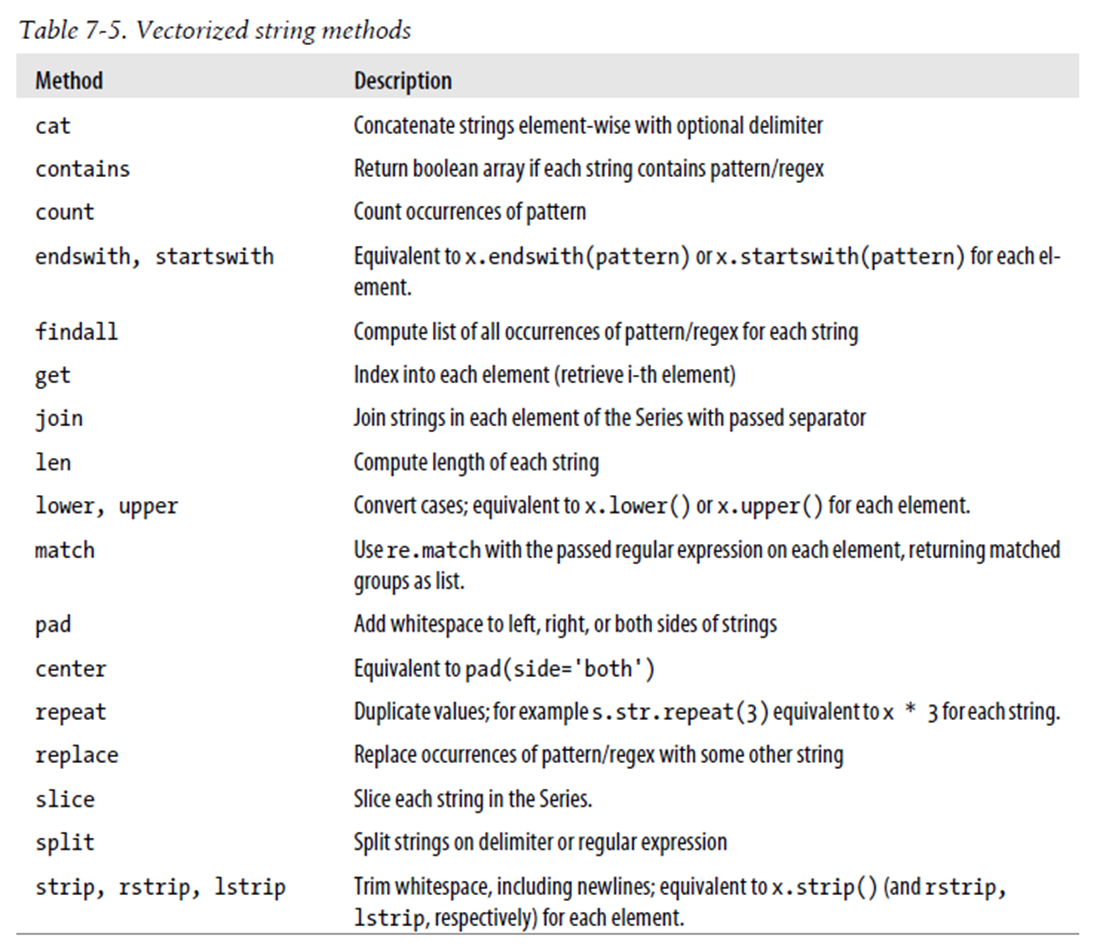

_Source: Python for Data Analysis, Wes McKinney_

## Value Counts

In [222]:
mtcars

mpg cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
rownames                                                                      
Mazda RX4            21.0   6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag        21.0   6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710           22.8   4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive       21.4   6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout    18.7   8  360.0  175  3.15  3.440  17.02   0   0     3   
Valiant              18.1   6  225.0  105  2.76  3.460  20.22   1   0     3   
Duster 360           14.3   8  360.0  245  3.21  3.570  15.84   0   0     3   
Merc 240D            24.4   4  146.7   62  3.69  3.190  20.00   1   0     4   
Merc 230             22.8   4  140.8   95  3.92  3.150  22.90   1   0     4   
Merc 280             19.2   6  167.6  123  3.92  3.440  18.30   1   0     4   
Merc 280C            17.8   6  167.6  123  3.92  3.440  18.90   1   0     4   
Merc 450SE           16.4   8  275.8  180  3.07  4.070  17.40   0   0     3   
Merc 450SL           17.3   8  275.8  180  3.07  3.730  17.60   0   0     3   
Merc 450SLC          15.2   8  275.8  180  3.07  3.780  18.00   0   0     3   
Cadillac Fleetwood   10.4   8  472.0  205  2.93  5.250  17.98   0   0     3   
Lincoln Continental  10.4   8  460.0  215  3.00  5.424  17.82   0   0     3   
Chrysler Imperial    14.7   8  440.0  230  3.23  5.345  17.42   0   0     3   
Fiat 128             32.4   4   78.7   66  4.08  2.200  19.47   1   1     4   
Honda Civic          30.4   4   75.7   52  4.93  1.615  18.52   1   1     4   
Toyota Corolla       33.9   4   71.1   65  4.22  1.835  19.90   1   1     4   
Toyota Corona        21.5   4  120.1   97  3.70  2.465  20.01   1   0     3   
Dodge Challenger     15.5   8  318.0  150  2.76  3.520  16.87   0   0     3   
AMC Javelin          15.2   8  304.0  150  3.15  3.435  17.30   0   0     3   
Camaro Z28           13.3   8  350.0  245  3.73  3.840  15.41   0   0     3   
Pontiac Firebird     19.2   8  400.0  175  3.08  3.845  17.05   0   0     3   
Fiat X1-9            27.3   4   79.0   66  4.08  1.935  18.90   1   1     4   
Porsche 914-2        26.0   4  120.3   91  4.43  2.140  16.70   0   1     5   
Lotus Europa         30.4   4   95.1  113  3.77  1.513  16.90   1   1     5   
Ford Pantera L       15.8   8  351.0  264  4.22  3.170  14.50   0   1     5   
Ferrari Dino         19.7   6  145.0  175  3.62  2.770  15.50   0   1     5   
Maserati Bora        15.0   8  301.0  335  3.54  3.570  14.60   0   1     5   
Volvo 142E           21.4   4  121.0  109  4.11  2.780  18.60   1   1     4   

                     carb  
rownames                   
Mazda RX4               4  
Mazda RX4 Wag           4  
Datsun 710              1  
Hornet 4 Drive          1  
Hornet Sportabout       2  
Valiant                 1  
Duster 360              4  
Merc 240D               2  
Merc 230                2  
Merc 280                4  
Merc 280C               4  
Merc 450SE              3  
Merc 450SL              3  
Merc 450SLC             3  
Cadillac Fleetwood      4  
Lincoln Continental     4  
Chrysler Imperial       4  
Fiat 128                1  
Honda Civic             2  
Toyota Corolla          1  
Toyota Corona           1  
Dodge Challenger        2  
AMC Javelin             2  
Camaro Z28              4  
Pontiac Firebird        2  
Fiat X1-9               1  
Porsche 914-2           2  
Lotus Europa            2  
Ford Pantera L          4  
Ferrari Dino            6  
Maserati Bora           8  
Volvo 142E              2

In [223]:
## value_counts provide the frequency for categorical variables
mtcars.cyl.value_counts()

cyl
8    14
4    11
6     7
Name: count, dtype: int64

In [224]:
## ...and we can get percentages instead too
mtcars.cyl.value_counts(normalize=True)

cyl
8    0.43750
4    0.34375
6    0.21875
Name: proportion, dtype: float64

In [225]:
# Just checking what range(60,64) returns

list(range(60,64))

[60, 61, 62, 63]

In [226]:
diamonds.depth.describe()

count    53940.000000
mean        61.749405
std          1.432621
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

In [227]:
## We can specify bins for numerical variables
# Below, we are saying give us value counts for 60-61, 61-62, 62-63.

diamonds = sns.load_dataset("diamonds")

diamonds.depth.value_counts(bins = range(60,64))

(61.0, 62.0]      17945
(62.0, 63.0]      15348
(59.999, 61.0]     8451
Name: count, dtype: int64

In [228]:
# Let us create a random vehicle crash dataframe with three columns showing
# city, cause of crash, and the dollar loss from the accident.
# Some of the values are missing, and indicated as a NaN (we create Nan
# values using np.nan)

df = pd.DataFrame(data = {'city': ['NYC', np.nan, 'Boston', 'Boston', 
                                   'WashingtonDC', np.nan, 'Boston', 
                                   'NYC', 'Boston', 'NYC'],
                         'cause': ['distracted', 'drowsy', 'drowsy', 
                                   np.nan, 'drunk', 'distracted', 
                                   'distracted', np.nan, np.nan, 'drunk'],
                         'dollar_loss': [8194, 4033, 9739, 4876, 4421, 
                                         6094, 5080, 2909, 9712, 2450]})

df

city       cause  dollar_loss
0           NYC  distracted         8194
1           NaN      drowsy         4033
2        Boston      drowsy         9739
3        Boston         NaN         4876
4  WashingtonDC       drunk         4421
5           NaN  distracted         6094
6        Boston  distracted         5080
7           NYC         NaN         2909
8        Boston         NaN         9712
9           NYC       drunk         2450

In [229]:
# Let us check the value_counts by city
# By default, missing values are ignored.
# So you don't see the NaNs.
# You can address it by setting dropna = False, as in the next cell

df.city.value_counts()

city
Boston          4
NYC             3
WashingtonDC    1
Name: count, dtype: int64

In [230]:
df.city.value_counts(dropna = False)

city
Boston          4
NYC             3
NaN             2
WashingtonDC    1
Name: count, dtype: int64

In [231]:
# Instead of counts, you can ask for percentages (expressed as a decimal)

df.city.value_counts(dropna = False, normalize = True)

city
Boston          0.4
NYC             0.3
NaN             0.2
WashingtonDC    0.1
Name: proportion, dtype: float64

In [232]:
# Sometimes, you may use the cumulative sum function to get 
# totals upto that value.  Try to run the cell to understand what it does.

df.city.value_counts().cumsum()

city
Boston          4
NYC             7
WashingtonDC    8
Name: count, dtype: int64

In [233]:
df.city.value_counts(dropna = False, normalize = True).cumsum()

city
Boston          0.4
NYC             0.7
NaN             0.9
WashingtonDC    1.0
Name: proportion, dtype: float64

## Extract unique values

In [234]:
diamonds.cut.unique()
## You can put `tolist()` at the end to get a cleaner output, or enclose everything in `list`.

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

## Groupby
`groupby` and `rename` use as parameters the `dict` format, which is curly brackets, and key : value, each within quotes.

For example, `{"old_colname" : "new_colname", "old_colname2" : "new_colname2"}` 

In [235]:
mydf = diamonds.groupby('cut', observed=True)
summ = mydf.agg({"price": "sum", "clarity": "count", "table": "mean"}) 
summ

price  clarity      table
cut                                    
Ideal      74513487    21551  55.951668
Premium    63221498    13791  58.746095
Very Good  48107623    12082  57.956150
Good       19275009     4906  58.694639
Fair        7017600     1610  59.053789

In [236]:
## Alternatively, everything could be combined together:
diamonds.groupby('cut', observed=True).agg({"price": "sum", "clarity": "count", "table": "mean"})

price  clarity      table
cut                                    
Ideal      74513487    21551  55.951668
Premium    63221498    13791  58.746095
Very Good  48107623    12082  57.956150
Good       19275009     4906  58.694639
Fair        7017600     1610  59.053789

In [237]:
## Or, groupby two variables:
diamonds.groupby(['cut', 'color'], observed=True).agg({"price": "sum", "clarity": "count", "table": "mean"})

price  clarity      table
cut       color                              
Ideal     D       7450854     2834  55.965632
          E      10138238     3903  55.967461
          F      12912518     3826  55.924203
          G      18171930     4884  55.902375
          H      12115278     3115  55.965843
          I       9317974     2093  56.021357
          J       4406695      896  56.012612
Premium   D       5820962     1603  58.718964
          E       8270443     2337  58.779461
          F      10081319     2331  58.679279
          G      13160170     2924  58.702360
          H      12311428     2360  58.792034
          I       8491146     1428  58.771849
          J       5086030      808  58.874752
Very Good D       5250817     1513  58.041309
          E       7715165     2400  58.038875
          F       8177367     2164  57.848429
          G       8903461     2299  57.784428
          H       8272552     1824  57.903015
          I       6328079     1204  58.105150
          J       3460182      678  58.277729
Good      D       2254363      662  58.541541
          E       3194260      933  58.779957
          F       3177637      909  58.910891
          G       3591553      871  58.471986
          H       3001931      702  58.611111
          I       2650994      522  58.773946
          J       1404271      307  58.813029
Fair      D        699443      163  58.969325
          E        824838      224  59.364732
          F       1194025      312  59.453205
          G       1331126      314  58.773248
          H       1556112      303  58.696370
          I        819953      175  59.237143
          J        592103      119  58.917647

### `rename` columns with Groupby

In [238]:
## We continue the above examples to rename the aggregated columns we created using groupby

diamonds.groupby('cut', observed=True).agg({"price": "sum", 
                             "clarity": "count"}).rename(columns = {"price": "total_price", "clarity": "diamond_count"})

total_price  diamond_count
cut                                  
Ideal         74513487          21551
Premium       63221498          13791
Very Good     48107623          12082
Good          19275009           4906
Fair           7017600           1610

## Joining Data with Merge

The data analyst often has to combine data frames much in the same way as database join operations work, which requires connecting two tables based on a reference field.

(joins of all types are discussed here: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.htmlhttps://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

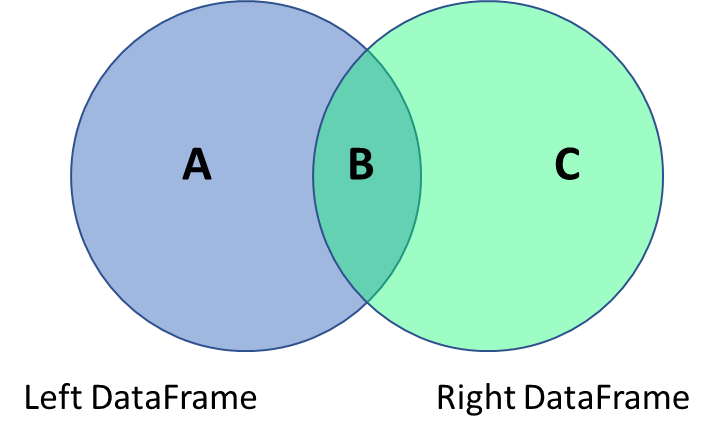

- Outer Join = A + B + C (keep everything)  
- Inner Join = B (keep only the intersection)  
- Left Join = A + B (keep all from the left)  
- Right Join = B + C (keep all from the right)  

You can join data using the pandas merge function.

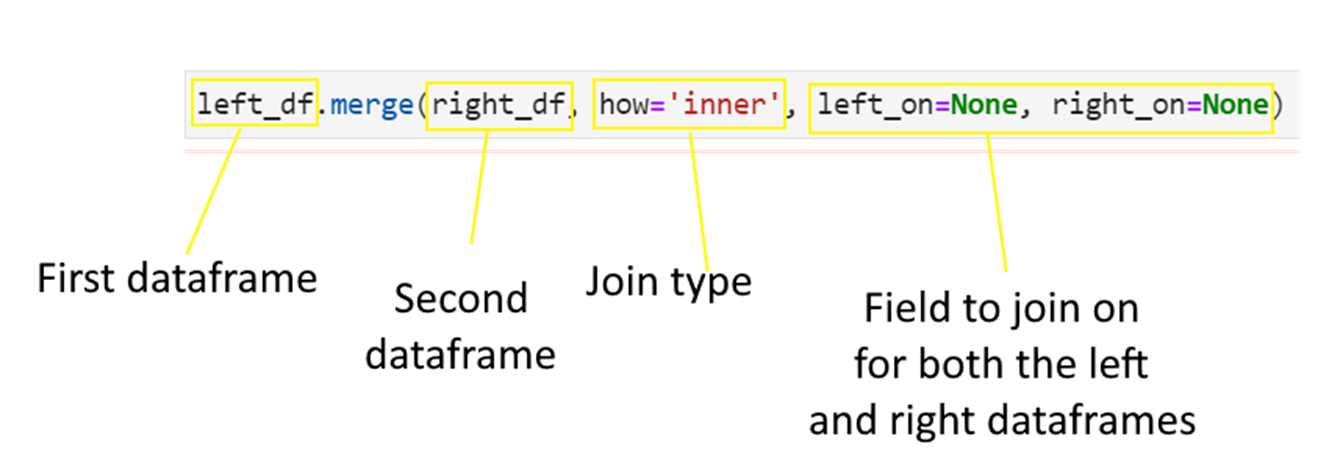

***
Consider the below data frames.  The first one is the **left** data frame, and the second one is the **right** data frame.  

Next consider the four types of joins - left, right, inner and outer.


In [303]:
## Left data frame

np.random.seed(2)
n = 5
df = pd.DataFrame(
    {'state': list(np.random.choice(["New York", "Florida", "California"], size=(n))), 
     'gender': list(np.random.choice(["Male", "Female"], size=(n), p=[.4, .6])),
     'housing': list(np.random.choice(["Rent", "Own"], size=(n))),     
     'height': list(np.random.randint(140,200,n))
     })

In [304]:
## Left data frame

df

state  gender housing  height
0    New York  Female     Own     177
1     Florida    Male    Rent     179
2    New York    Male    Rent     143
3  California  Female    Rent     178
4  California    Male    Rent     144

In [305]:
## Right data frame

df_rent = pd.DataFrame(
          {'state': ["Connecticut", "Florida", "California"],
           'avg_rent': [3500, 2200, 4500]})

In [306]:
## Right data frame

df_rent

state  avg_rent
0  Connecticut      3500
1      Florida      2200
2   California      4500

### Left Join

In [307]:
df.merge(df_rent, how = 'left' , 
         left_on = 'state', right_on = 'state')

state  gender housing  height  avg_rent
0    New York  Female     Own     177       NaN
1     Florida    Male    Rent     179    2200.0
2    New York    Male    Rent     143       NaN
3  California  Female    Rent     178    4500.0
4  California    Male    Rent     144    4500.0

### Right Join

In [308]:
df.merge(df_rent, how = 'right' , 
         left_on = 'state', right_on = 'state')

state  gender housing  height  avg_rent
0  Connecticut     NaN     NaN     NaN      3500
1      Florida    Male    Rent   179.0      2200
2   California  Female    Rent   178.0      4500
3   California    Male    Rent   144.0      4500

### Inner Join

In [309]:
df.merge(df_rent, how = 'inner' , 
         left_on = 'state', right_on = 'state')

state  gender housing  height  avg_rent
0     Florida    Male    Rent     179      2200
1  California  Female    Rent     178      4500
2  California    Male    Rent     144      4500

### Outer Join

In [310]:
df.merge(df_rent, how = 'outer' , 
         left_on = 'state', right_on = 'state')

state  gender housing  height  avg_rent
0   California  Female    Rent   178.0    4500.0
1   California    Male    Rent   144.0    4500.0
2  Connecticut     NaN     NaN     NaN    3500.0
3      Florida    Male    Rent   179.0    2200.0
4     New York  Female     Own   177.0       NaN
5     New York    Male    Rent   143.0       NaN

### Cross Join
Join everything with everything! 

In [312]:
df.merge(df_rent, how = 'cross')

state_x  gender housing  height      state_y  avg_rent
0     New York  Female     Own     177  Connecticut      3500
1     New York  Female     Own     177      Florida      2200
2     New York  Female     Own     177   California      4500
3      Florida    Male    Rent     179  Connecticut      3500
4      Florida    Male    Rent     179      Florida      2200
5      Florida    Male    Rent     179   California      4500
6     New York    Male    Rent     143  Connecticut      3500
7     New York    Male    Rent     143      Florida      2200
8     New York    Male    Rent     143   California      4500
9   California  Female    Rent     178  Connecticut      3500
10  California  Female    Rent     178      Florida      2200
11  California  Female    Rent     178   California      4500
12  California    Male    Rent     144  Connecticut      3500
13  California    Male    Rent     144      Florida      2200
14  California    Male    Rent     144   California      4500

## Concatenation

Sometimes we need to simply combine datasets without any fancy operations.  

Imagine you have 3 files, each for a different month, and you need to stack them vertically one after the other.

Occasionally, you may need to stack datasets horizontally, ie right next to each other.  For example, imagine you have 2 files, one with names and ages, and the other with names and income. You may just want to ‘stack’ the data next to each other.

As a common operation, this can be done with Pandas’s concat() command.

We use the same df and df_rent dataframes as in the prior slide to illustrate how pd.concat works.

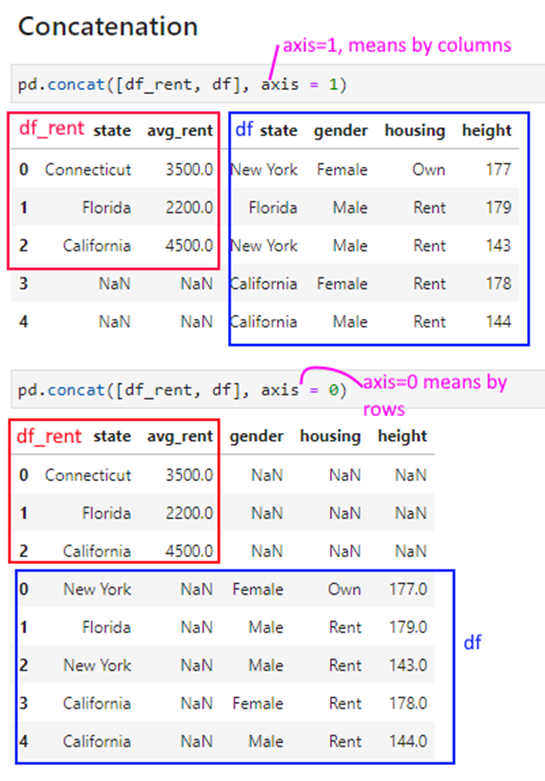

In [247]:
pd.concat([df_rent, df], axis = 1)

state  avg_rent       state  gender housing  height
0  Connecticut    3500.0    New York  Female     Own     177
1      Florida    2200.0     Florida    Male    Rent     179
2   California    4500.0    New York    Male    Rent     143
3          NaN       NaN  California  Female    Rent     178
4          NaN       NaN  California    Male    Rent     144

In [248]:
pd.concat([df_rent, df], axis = 0)

state  avg_rent  gender housing  height
0  Connecticut    3500.0     NaN     NaN     NaN
1      Florida    2200.0     NaN     NaN     NaN
2   California    4500.0     NaN     NaN     NaN
0     New York       NaN  Female     Own   177.0
1      Florida       NaN    Male    Rent   179.0
2     New York       NaN    Male    Rent   143.0
3   California       NaN  Female    Rent   178.0
4   California       NaN    Male    Rent   144.0

### Concatenation example

We load the penguins dataset.

In [314]:
# Load the penguins dataset

df = sns.load_dataset('penguins')
df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

In [315]:
df1 = df.sample(6).reset_index(drop=True)
df2 = df.sample(4).reset_index(drop=True)

In [316]:
df1

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0     Gentoo  Biscoe            45.2           15.8              215.0   
1     Adelie  Biscoe            37.9           18.6              172.0   
2     Adelie  Biscoe            37.8           18.3              174.0   
3     Adelie   Dream            40.6           17.2              187.0   
4  Chinstrap   Dream            50.1           17.9              190.0   
5     Gentoo  Biscoe            46.5           13.5              210.0   

   body_mass_g     sex  
0       5300.0    Male  
1       3150.0  Female  
2       3400.0  Female  
3       3475.0    Male  
4       3400.0  Female  
5       4550.0  Female

In [317]:
df1.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [321]:
df1 = df1[['bill_length_mm', 'bill_depth_mm','body_mass_g', 'sex','flipper_length_mm', ]]
df1

bill_length_mm  bill_depth_mm  body_mass_g     sex  flipper_length_mm
0            45.2           15.8       5300.0    Male              215.0
1            37.9           18.6       3150.0  Female              172.0
2            37.8           18.3       3400.0  Female              174.0
3            40.6           17.2       3475.0    Male              187.0
4            50.1           17.9       3400.0  Female              190.0
5            46.5           13.5       4550.0  Female              210.0

In [319]:
df2

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Gentoo     Biscoe            46.4           15.6              221.0   
1  Gentoo     Biscoe            48.4           14.4              203.0   
2  Gentoo     Biscoe            49.0           16.1              216.0   
3  Adelie  Torgersen            35.9           16.6              190.0   

   body_mass_g     sex  
0       5000.0    Male  
1       4625.0  Female  
2       5550.0    Male  
3       3050.0  Female

In [322]:
pd.concat([df1,df2], axis=0)

bill_length_mm  bill_depth_mm  body_mass_g     sex  flipper_length_mm  \
0            45.2           15.8       5300.0    Male              215.0   
1            37.9           18.6       3150.0  Female              172.0   
2            37.8           18.3       3400.0  Female              174.0   
3            40.6           17.2       3475.0    Male              187.0   
4            50.1           17.9       3400.0  Female              190.0   
5            46.5           13.5       4550.0  Female              210.0   
0            46.4           15.6       5000.0    Male              221.0   
1            48.4           14.4       4625.0  Female              203.0   
2            49.0           16.1       5550.0    Male              216.0   
3            35.9           16.6       3050.0  Female              190.0   

  species     island  
0     NaN        NaN  
1     NaN        NaN  
2     NaN        NaN  
3     NaN        NaN  
4     NaN        NaN  
5     NaN        NaN  
0  Gentoo     Biscoe  
1  Gentoo     Biscoe  
2  Gentoo     Biscoe  
3  Adelie  Torgersen

In [253]:
pd.concat([df1,df2], axis=0)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0     Gentoo     Biscoe            45.2           15.8              215.0   
1     Adelie     Biscoe            37.9           18.6              172.0   
2     Adelie     Biscoe            37.8           18.3              174.0   
3     Adelie      Dream            40.6           17.2              187.0   
4  Chinstrap      Dream            50.1           17.9              190.0   
5     Gentoo     Biscoe            46.5           13.5              210.0   
0     Gentoo     Biscoe            46.4           15.6              221.0   
1     Gentoo     Biscoe            48.4           14.4              203.0   
2     Gentoo     Biscoe            49.0           16.1              216.0   
3     Adelie  Torgersen            35.9           16.6              190.0   

   body_mass_g     sex  
0       5300.0    Male  
1       3150.0  Female  
2       3400.0  Female  
3       3475.0    Male  
4       3400.0  Female  
5       4550.0  Female  
0       5000.0    Male  
1       4625.0  Female  
2       5550.0    Male  
3       3050.0  Female

In [254]:
pd.concat([df1,df2], axis=1)

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0     Gentoo  Biscoe            45.2           15.8              215.0   
1     Adelie  Biscoe            37.9           18.6              172.0   
2     Adelie  Biscoe            37.8           18.3              174.0   
3     Adelie   Dream            40.6           17.2              187.0   
4  Chinstrap   Dream            50.1           17.9              190.0   
5     Gentoo  Biscoe            46.5           13.5              210.0   

   body_mass_g     sex species     island  bill_length_mm  bill_depth_mm  \
0       5300.0    Male  Gentoo     Biscoe            46.4           15.6   
1       3150.0  Female  Gentoo     Biscoe            48.4           14.4   
2       3400.0  Female  Gentoo     Biscoe            49.0           16.1   
3       3475.0    Male  Adelie  Torgersen            35.9           16.6   
4       3400.0  Female     NaN        NaN             NaN            NaN   
5       4550.0  Female     NaN        NaN             NaN            NaN   

   flipper_length_mm  body_mass_g     sex  
0              221.0       5000.0    Male  
1              203.0       4625.0  Female  
2              216.0       5550.0    Male  
3              190.0       3050.0  Female  
4                NaN          NaN     NaN  
5                NaN          NaN     NaN

In [255]:
df2.index = [3,4,5,6]

In [256]:
pd.concat([df1,df2], axis=0)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0     Gentoo     Biscoe            45.2           15.8              215.0   
1     Adelie     Biscoe            37.9           18.6              172.0   
2     Adelie     Biscoe            37.8           18.3              174.0   
3     Adelie      Dream            40.6           17.2              187.0   
4  Chinstrap      Dream            50.1           17.9              190.0   
5     Gentoo     Biscoe            46.5           13.5              210.0   
3     Gentoo     Biscoe            46.4           15.6              221.0   
4     Gentoo     Biscoe            48.4           14.4              203.0   
5     Gentoo     Biscoe            49.0           16.1              216.0   
6     Adelie  Torgersen            35.9           16.6              190.0   

   body_mass_g     sex  
0       5300.0    Male  
1       3150.0  Female  
2       3400.0  Female  
3       3475.0    Male  
4       3400.0  Female  
5       4550.0  Female  
3       5000.0    Male  
4       4625.0  Female  
5       5550.0    Male  
6       3050.0  Female

In [257]:
pd.concat([df1,df2], axis=1)

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0     Gentoo  Biscoe            45.2           15.8              215.0   
1     Adelie  Biscoe            37.9           18.6              172.0   
2     Adelie  Biscoe            37.8           18.3              174.0   
3     Adelie   Dream            40.6           17.2              187.0   
4  Chinstrap   Dream            50.1           17.9              190.0   
5     Gentoo  Biscoe            46.5           13.5              210.0   
6        NaN     NaN             NaN            NaN                NaN   

   body_mass_g     sex species     island  bill_length_mm  bill_depth_mm  \
0       5300.0    Male     NaN        NaN             NaN            NaN   
1       3150.0  Female     NaN        NaN             NaN            NaN   
2       3400.0  Female     NaN        NaN             NaN            NaN   
3       3475.0    Male  Gentoo     Biscoe            46.4           15.6   
4       3400.0  Female  Gentoo     Biscoe            48.4           14.4   
5       4550.0  Female  Gentoo     Biscoe            49.0           16.1   
6          NaN     NaN  Adelie  Torgersen            35.9           16.6   

   flipper_length_mm  body_mass_g     sex  
0                NaN          NaN     NaN  
1                NaN          NaN     NaN  
2                NaN          NaN     NaN  
3              221.0       5000.0    Male  
4              203.0       4625.0  Female  
5              216.0       5550.0    Male  
6              190.0       3050.0  Female

In [258]:
# Notice above dataframe has columns with identical names
# For example,the column bill_depth_mm appears twice.
# If we try to select that column, all columns with that name are listed

temp = pd.concat([df1,df2], axis=1)
temp[['bill_depth_mm']]

bill_depth_mm  bill_depth_mm
0           15.8            NaN
1           18.6            NaN
2           18.3            NaN
3           17.2           15.6
4           17.9           14.4
5           13.5           16.1
6            NaN           16.6

## Dealing with Missing Values

Missing data takes one of two forms.  
1. Entire rows of data may be missing: In such situations, you will need to think about if the remaining data set is still valuable.  
 - Consider if you can assess how much data is missing.  If only a small portion of the data is missing, say 10%, then you may still be able to use it for meaningful analytics.  
 - Consider why the data is missing.  If the absent data is missing at random, what you have available may still be a representative sample.  
 - Consider if you can re-acquire the data, or address the underlying problems and wait to collect the complete dataset.  
2. Some values may be missing in the data, while others are present.  
 - We can remove the rows that have missing values.  
 - We can replace the missing values with a static default (eg, the mean, or the median).  
 - We can try to compute the values in a more structured way.  
 
An example of missing data appears in the picture below.  Next, we will create this dataset and artifically insert some missing values.

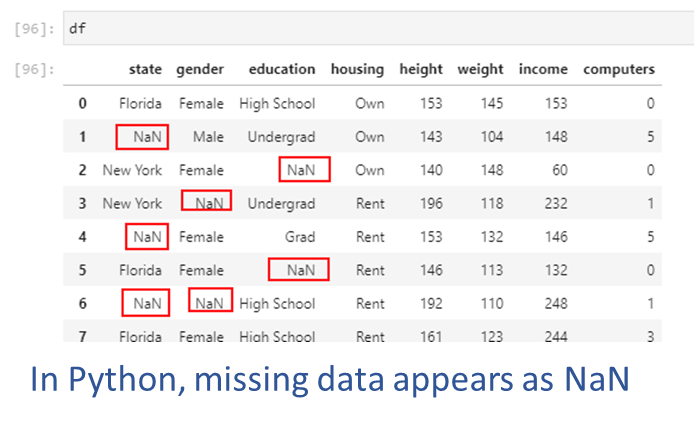

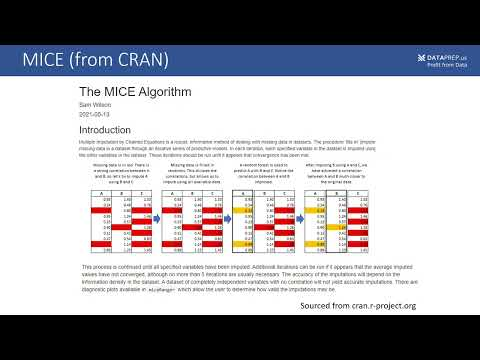

In [259]:
YouTubeVideo('106wMohSma8', width=672, height=378)

In [260]:
## We create a random dataset

np.random.seed(1)
n = 5
df = pd.DataFrame(
    {'state': list(np.random.choice(["New York", "Florida", "California"], size=(n))), 
     'gender': list(np.random.choice(["Male", "Female"], size=(n), p=[.4, .6])),
     'housing': list(np.random.choice(["Rent", "Own"], size=(n))),    
     'height': list(np.random.randint(140,200,n))
     })

In [261]:
## Now we loop through the data and replace a quarter of the values with NaN (`np.nan`)

for row in range(df.shape[0]):
    for col in range(df.shape[1]):
        if np.random.uniform() < 0.25:
            df.iloc[row,col] = np.nan

In [262]:
## Notice the `NaN` values inserted  
df

state gender housing  height
0   Florida   Male    Rent   160.0
1  New York   Male    Rent   151.0
2       NaN   Male    Rent   182.0
3   Florida   Male     NaN   168.0
4   Florida   Male    Rent     NaN

### Understanding the extent of missing values
We can count the number of null values, by rows as well as columns.  

In pandas, it is easy to identify null values using `df.isna()`.  While this provides us a series of True/False Booleans, we can use the `sum()` command to get the total count of nulls as Booleans are also considered equal to 1 and 0 (for True and False respectively).  

Using the axis parameter, we can specify whether to count missing values by rows (`axis = 1`) or by columns (`axis = 0`, the default).  

 - Count of nulls for each column: `df.isna().sum(axis=0)`  
 - Count of nulls for each row: `df.isna().sum(axis=1)`  


In [263]:
## Count missing values - by columns

df.isna().sum(axis=0)


state      1
gender     0
housing    1
height     1
dtype: int64

In [264]:
## Count missing values - by rows

df.isna().sum(axis=1)


0    0
1    0
2    1
3    1
4    1
dtype: int64

In [265]:
## Count missing values - by columns, sorted

df.isna().sum(axis=0).sort_values(ascending=False)


state      1
housing    1
height     1
gender     0
dtype: int64

In [266]:
df.isna().sum(axis=1).sort_values(ascending=False)

2    1
3    1
4    1
0    0
1    0
dtype: int64

### How to think about missing values
Sometimes, entire rows/observations or columns/features data may be missing in the data (for example, you discover that you are missing data for a city, person, year etc).  If the data is not there in the first place, there is no easy programmatic way to discover the omission.  You may find out about it only accidentally, or through your exploratory data analysis.  

In such situations, you will need to think about if the remaining data set is still valuable.  
 - Consider if you can assess how much data is missing.  If only a small portion of the data is missing, say 10%, then you may still be able to use it for meaningful analytics.  
 - Consider why the data is missing.  If the absent data is missing at random, what you have available may still be a representative sample.  
 - Consider if you can re-acquire the data, or address the underlying problems and wait to collect the complete dataset.  

**Approaches**  
When some values in the data are missing:  
1. **Drop rows with nulls:** If data is missing at random, and the remaining data is sufficient for us to build generalizable analytics and models.  
   - If data is not missing at random, and rows with missing data are dropped, this can introduce bias into our models.  
3. **Drop features/columns with nulls:** Features that have a great deal of data missing at random can often be dropped without affecting analytical usefulness.  
4. **Replace with a static default:** Using a summary statistic, eg mean or median, is often an easy way to replace missing values.  
5. **Impute missing values** using more advanced methods.  

#### Drop Missing Values
The simplest approach is to drop the rows that have a missing value.  This will leave only the rows that are fully populated.  

Pandas offers the function `dropna()` to remove rows with missing values.

You can control which rows are deleted:

 - Set a threshold _n_ – at least _n_ values must be missing before the row is dropped
 - Any or All – whether all values should be missing, or any missing values.


##### Drop rows with missing values

In [267]:
df

state gender housing  height
0   Florida   Male    Rent   160.0
1  New York   Male    Rent   151.0
2       NaN   Male    Rent   182.0
3   Florida   Male     NaN   168.0
4   Florida   Male    Rent     NaN

In [268]:
df.dropna()

state gender housing  height
0   Florida   Male    Rent   160.0
1  New York   Male    Rent   151.0

##### Drop columns with missing values

Very similar approach as for rows, except the axis along which we evaluate deletion is vertical instead of horizontal.

Any columns that have a missing value are deleted.


In [269]:
df.dropna(axis = 1)

gender
0   Male
1   Male
2   Male
3   Male
4   Male

In [270]:
df


state gender housing  height
0   Florida   Male    Rent   160.0
1  New York   Male    Rent   151.0
2       NaN   Male    Rent   182.0
3   Florida   Male     NaN   168.0
4   Florida   Male    Rent     NaN

#### Fill Missing Data

Dropping rows or columns that have missing data may not always be a feasible strategy as the remainder of the dataset may become too small.  

Another reason is that we may not want to throw away all the other known information just because one data point for an observation or a feature is not known.

If the data is not missing at random (for example, one sensor in the data collection apparatus was malfunctioning) and all the NaN values relate to a particular type of observation, we will introduce bias into any analytics we perform.

A viable approach in such cases may be to replace the missing values with an estimate, such as the mean, the median, or the most frequent value.

Using `pd.fillna()`, we can fill any holes in the data in a number of ways.
With `df.fillna(constant)`, we can replace all `NaN` values with a constant we specify.  However, if `NaN`s appear in multiple columns, we may need to specify a different constant for each column.

With `pd.fillna(data.mean())`, we can replace `NaN`s with the mean, and similarly for median and other calculated measures.


In [271]:
## Fill missing values across the entire dataframe

df.fillna('Connecticut')

state gender      housing       height
0      Florida   Male         Rent        160.0
1     New York   Male         Rent        151.0
2  Connecticut   Male         Rent        182.0
3      Florida   Male  Connecticut        168.0
4      Florida   Male         Rent  Connecticut

In [323]:
## Fill missing values in only a single column

df.fillna({'housing': 'Connecticut'}, inplace=True)
df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

### Forward and Backward Fill

For time series data, we might like to use forward-fill (also called ‘last-observation-carried-forward’, or locf), and backward-fill (opposite of locf).


 - `df.ffill`: propagate last valid observation forward to next valid
 - `df.bfill`: use next valid observation to fill gap.


In [273]:
## Let us make some of the height numbers NaN
df.loc[[0,3], 'height'] = np.nan

In [274]:
df

state gender housing  height
0      Florida   Male    Rent     NaN
1     New York   Male    Rent   151.0
2  Connecticut   Male    Rent   182.0
3      Florida   Male     NaN     NaN
4      Florida   Male    Rent     NaN

In [275]:
# Forward fill
df.ffill()


state gender housing  height
0      Florida   Male    Rent     NaN
1     New York   Male    Rent   151.0
2  Connecticut   Male    Rent   182.0
3      Florida   Male    Rent   182.0
4      Florida   Male    Rent   182.0

In [276]:
# Backward fill
df.bfill()


state gender housing  height
0      Florida   Male    Rent   151.0
1     New York   Male    Rent   151.0
2  Connecticut   Male    Rent   182.0
3      Florida   Male    Rent     NaN
4      Florida   Male    Rent     NaN

In [277]:
# We load some data on sales of independent winemakers
import pmdarima
df = pd.DataFrame(pmdarima.datasets.load_wineind(as_series = True), columns=['sales'])
df

sales
Jan 1980  15136.0
Feb 1980  16733.0
Mar 1980  20016.0
Apr 1980  17708.0
May 1980  18019.0
...           ...
Apr 1994  26323.0
May 1994  23779.0
Jun 1994  27549.0
Jul 1994  29660.0
Aug 1994  23356.0

[176 rows x 1 columns]

In [278]:
## Now we loop through the data and replace a quarter of the values with NaN (`np.nan`)

for row in range(df.shape[0]):
    for col in range(df.shape[1]):
        if np.random.uniform() < 0.5:
            df.iloc[row,col] = np.nan

In [279]:
df = df[:20]
df

sales
Jan 1980      NaN
Feb 1980      NaN
Mar 1980  20016.0
Apr 1980      NaN
May 1980      NaN
Jun 1980  19227.0
Jul 1980  22893.0
Aug 1980      NaN
Sep 1980      NaN
Oct 1980      NaN
Nov 1980      NaN
Dec 1980      NaN
Jan 1981      NaN
Feb 1981  17977.0
Mar 1981      NaN
Apr 1981  21354.0
May 1981      NaN
Jun 1981  22125.0
Jul 1981  25817.0
Aug 1981      NaN

In [280]:
df.ffill()

sales
Jan 1980      NaN
Feb 1980      NaN
Mar 1980  20016.0
Apr 1980  20016.0
May 1980  20016.0
Jun 1980  19227.0
Jul 1980  22893.0
Aug 1980  22893.0
Sep 1980  22893.0
Oct 1980  22893.0
Nov 1980  22893.0
Dec 1980  22893.0
Jan 1981  22893.0
Feb 1981  17977.0
Mar 1981  17977.0
Apr 1981  21354.0
May 1981  21354.0
Jun 1981  22125.0
Jul 1981  25817.0
Aug 1981  25817.0

In [281]:
df.bfill()

sales
Jan 1980  20016.0
Feb 1980  20016.0
Mar 1980  20016.0
Apr 1980  19227.0
May 1980  19227.0
Jun 1980  19227.0
Jul 1980  22893.0
Aug 1980  17977.0
Sep 1980  17977.0
Oct 1980  17977.0
Nov 1980  17977.0
Dec 1980  17977.0
Jan 1981  17977.0
Feb 1981  17977.0
Mar 1981  21354.0
Apr 1981  21354.0
May 1981  22125.0
Jun 1981  22125.0
Jul 1981  25817.0
Aug 1981      NaN

***
## Imputation using sklearn

Discarding entire rows or columns, or replacing information with the mean etc may work well in some situations.
A more sophisticated approach may be to model the missing data, and use ML techniques to estimate the missing information.

Scikit-learn’s documentation describes multivariate feature imputation as follows: 
> A more sophisticated approach is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

_Source: https://scikit-learn.org/stable/modules/impute.html_

The R ecosystem has several libraries that implement the MICE algorithm.  

A nice write-up and graphic explaining the process is available here: https://cran.r-project.org/web/packages/miceRanger/vignettes/miceAlgorithm.html

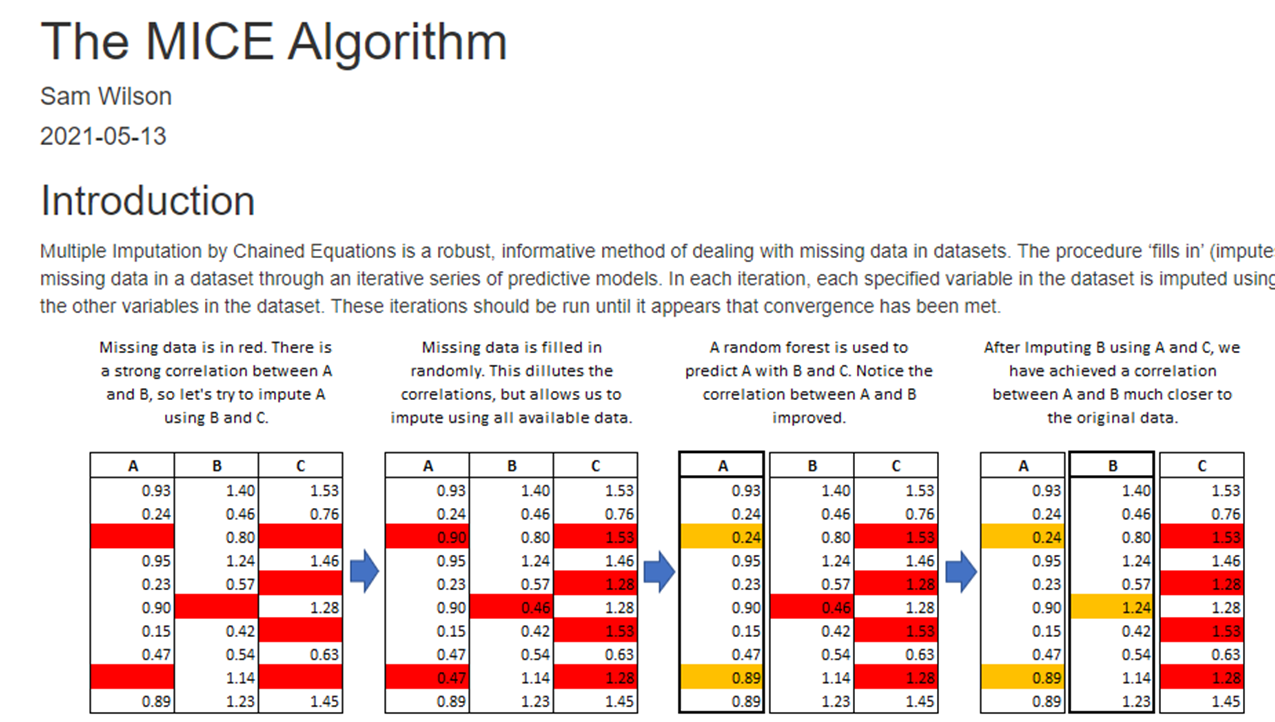
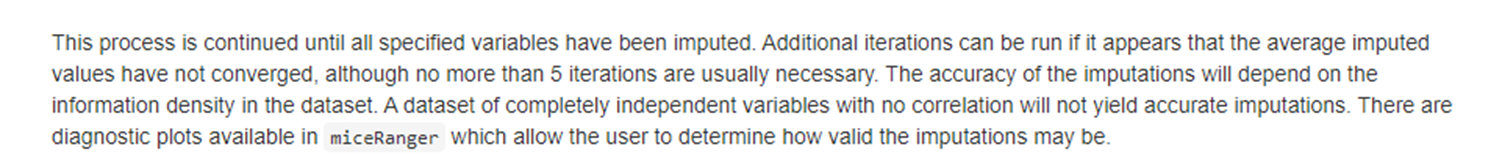
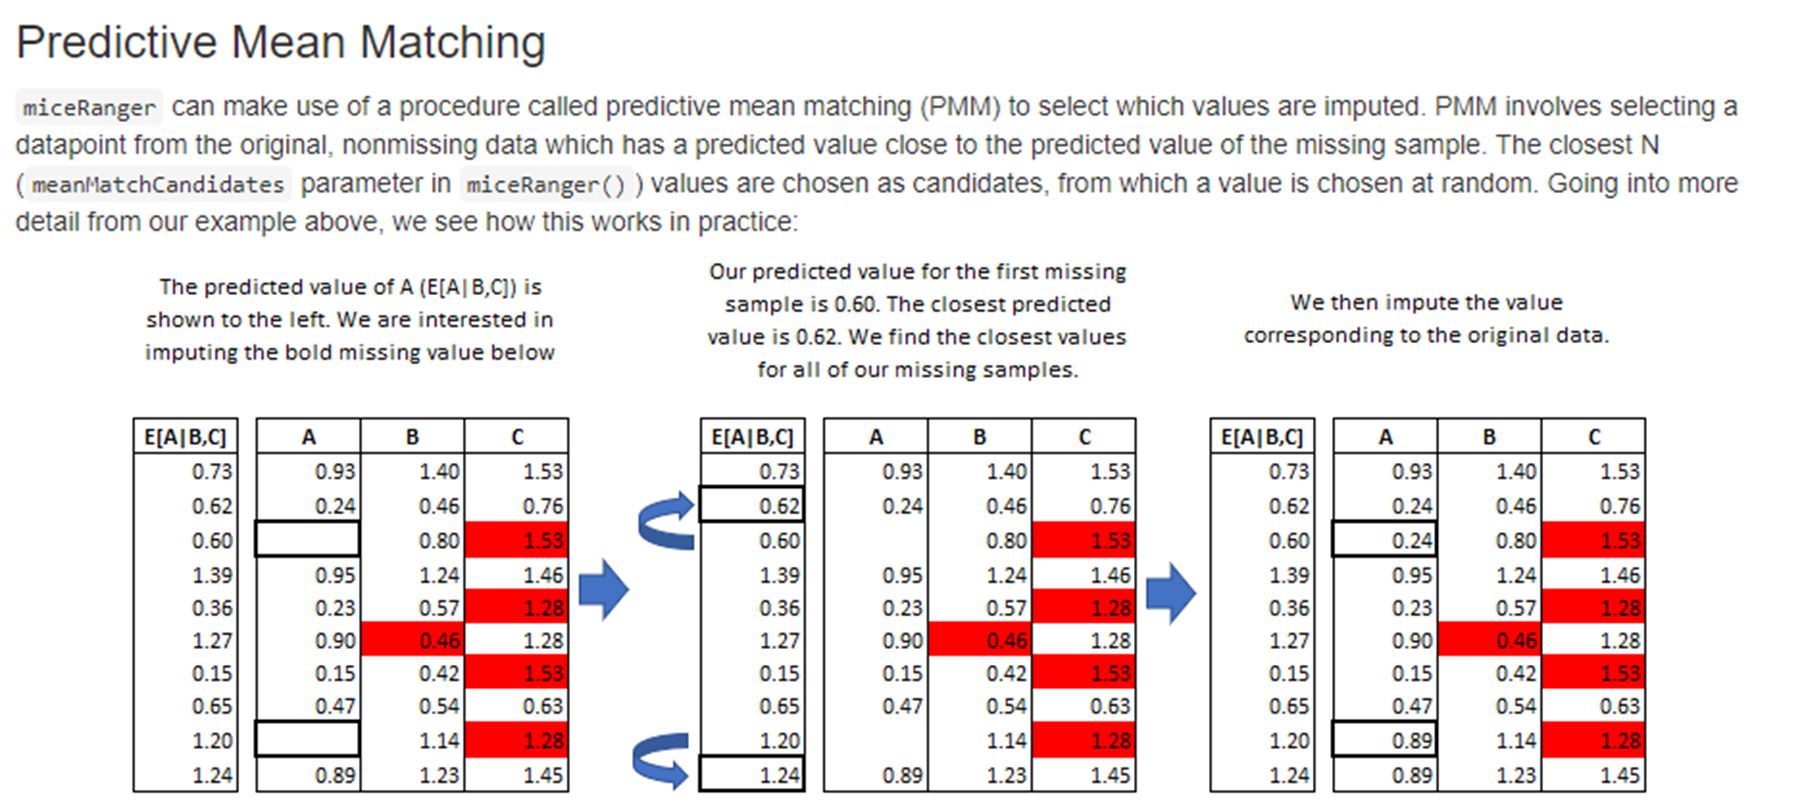
_Sourced from cran.r-project.org_


Let us get some data where we can perform some imputations.  But because we are working with Python, we will not use the above, but use sklearn's imputer.

In [325]:
## Let us look at the mtcars dataset

import statsmodels.api as sm
df = sm.datasets.get_rdataset('mtcars').data

In [326]:
df

mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
rownames                                                                       
Mazda RX4            21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag        21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710           22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive       21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout    18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   
Valiant              18.1    6  225.0  105  2.76  3.460  20.22   1   0     3   
Duster 360           14.3    8  360.0  245  3.21  3.570  15.84   0   0     3   
Merc 240D            24.4    4  146.7   62  3.69  3.190  20.00   1   0     4   
Merc 230             22.8    4  140.8   95  3.92  3.150  22.90   1   0     4   
Merc 280             19.2    6  167.6  123  3.92  3.440  18.30   1   0     4   
Merc 280C            17.8    6  167.6  123  3.92  3.440  18.90   1   0     4   
Merc 450SE           16.4    8  275.8  180  3.07  4.070  17.40   0   0     3   
Merc 450SL           17.3    8  275.8  180  3.07  3.730  17.60   0   0     3   
Merc 450SLC          15.2    8  275.8  180  3.07  3.780  18.00   0   0     3   
Cadillac Fleetwood   10.4    8  472.0  205  2.93  5.250  17.98   0   0     3   
Lincoln Continental  10.4    8  460.0  215  3.00  5.424  17.82   0   0     3   
Chrysler Imperial    14.7    8  440.0  230  3.23  5.345  17.42   0   0     3   
Fiat 128             32.4    4   78.7   66  4.08  2.200  19.47   1   1     4   
Honda Civic          30.4    4   75.7   52  4.93  1.615  18.52   1   1     4   
Toyota Corolla       33.9    4   71.1   65  4.22  1.835  19.90   1   1     4   
Toyota Corona        21.5    4  120.1   97  3.70  2.465  20.01   1   0     3   
Dodge Challenger     15.5    8  318.0  150  2.76  3.520  16.87   0   0     3   
AMC Javelin          15.2    8  304.0  150  3.15  3.435  17.30   0   0     3   
Camaro Z28           13.3    8  350.0  245  3.73  3.840  15.41   0   0     3   
Pontiac Firebird     19.2    8  400.0  175  3.08  3.845  17.05   0   0     3   
Fiat X1-9            27.3    4   79.0   66  4.08  1.935  18.90   1   1     4   
Porsche 914-2        26.0    4  120.3   91  4.43  2.140  16.70   0   1     5   
Lotus Europa         30.4    4   95.1  113  3.77  1.513  16.90   1   1     5   
Ford Pantera L       15.8    8  351.0  264  4.22  3.170  14.50   0   1     5   
Ferrari Dino         19.7    6  145.0  175  3.62  2.770  15.50   0   1     5   
Maserati Bora        15.0    8  301.0  335  3.54  3.570  14.60   0   1     5   
Volvo 142E           21.4    4  121.0  109  4.11  2.780  18.60   1   1     4   

                     carb  
rownames                   
Mazda RX4               4  
Mazda RX4 Wag           4  
Datsun 710              1  
Hornet 4 Drive          1  
Hornet Sportabout       2  
Valiant                 1  
Duster 360              4  
Merc 240D               2  
Merc 230                2  
Merc 280                4  
Merc 280C               4  
Merc 450SE              3  
Merc 450SL              3  
Merc 450SLC             3  
Cadillac Fleetwood      4  
Lincoln Continental     4  
Chrysler Imperial       4  
Fiat 128                1  
Honda Civic             2  
Toyota Corolla          1  
Toyota Corona           1  
Dodge Challenger        2  
AMC Javelin             2  
Camaro Z28              4  
Pontiac Firebird        2  
Fiat X1-9               1  
Porsche 914-2           2  
Lotus Europa            2  
Ford Pantera L          4  
Ferrari Dino            6  
Maserati Bora           8  
Volvo 142E              2

In [327]:
## Next, we replace a quarter of the values in the data with NaNs

for row in range(df.shape[0]):
    for col in range(df.shape[1]):
        if np.random.uniform() < 0.25:
            df.iloc[row,col] = np.nan

In [332]:
df.describe()

mpg        cyl        disp          hp       drat         wt  \
count  22.000000  21.000000   22.000000   24.000000  26.000000  28.000000   
mean   20.104545   5.809524  219.818182  157.000000   3.607692   3.214357   
std     5.287765   1.778175  124.392748   70.173078   0.510453   1.011753   
min    10.400000   4.000000   75.700000   52.000000   2.760000   1.513000   
25%    15.950000   4.000000  120.475000  102.500000   3.150000   2.581250   
50%    19.200000   6.000000  163.800000  162.500000   3.695000   3.325000   
75%    22.800000   8.000000  313.750000  186.250000   3.920000   3.570000   
max    30.400000   8.000000  472.000000  335.000000   4.930000   5.424000   

            qsec         vs         am       gear       carb  
count  26.000000  19.000000  22.000000  26.000000  26.000000  
mean   18.044231   0.421053   0.454545   3.615385   3.038462  
std     1.754980   0.507257   0.509647   0.697247   1.684773  
min    14.600000   0.000000   0.000000   3.000000   1.000000  
25%    17.020000   0.000000   0.000000   3.000000   2.000000  
50%    17.990000   0.000000   0.000000   3.500000   3.000000  
75%    18.900000   1.000000   1.000000   4.000000   4.000000  
max    22.900000   1.000000   1.000000   5.000000   8.000000

## Simple Imputer
Simple Imputer imputes values for a feature using only non-missing values in that feature dimension. 
Valid strategies are mean, median, most_frequent, constant.


In [329]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [330]:
pd.DataFrame(imp.fit_transform(df), columns = df.columns, index = df.index).round(1)

mpg  cyl   disp     hp  drat   wt  qsec   vs   am  gear  \
rownames                                                                        
Mazda RX4            21.0  6.0  160.0  157.0   3.9  2.6  16.5  0.0  1.0   4.0   
Mazda RX4 Wag        21.0  6.0  160.0  157.0   3.9  2.9  17.0  0.4  1.0   3.6   
Datsun 710           22.8  4.0  108.0   93.0   3.8  3.2  18.6  1.0  0.5   3.6   
Hornet 4 Drive       20.1  6.0  258.0  157.0   3.6  3.2  19.4  1.0  0.5   3.6   
Hornet Sportabout    18.7  5.8  360.0  175.0   3.2  3.4  17.0  0.0  0.0   3.0   
Valiant              18.1  6.0  219.8  105.0   3.6  3.5  20.2  0.4  0.0   3.0   
Duster 360           14.3  8.0  219.8  245.0   3.2  3.6  18.0  0.0  0.0   3.0   
Merc 240D            24.4  4.0  219.8   62.0   3.7  3.2  20.0  1.0  0.0   4.0   
Merc 230             22.8  4.0  140.8   95.0   3.9  3.2  22.9  0.4  0.5   4.0   
Merc 280             19.2  6.0  167.6  123.0   3.9  3.4  18.3  1.0  0.0   4.0   
Merc 280C            17.8  5.8  167.6  157.0   3.9  3.4  18.9  1.0  0.0   4.0   
Merc 450SE           16.4  5.8  219.8  180.0   3.6  3.2  17.4  0.4  0.5   3.0   
Merc 450SL           20.1  8.0  275.8  180.0   3.1  3.7  17.6  0.0  0.0   3.0   
Merc 450SLC          20.1  5.8  219.8  180.0   3.1  3.2  18.0  0.0  0.5   3.6   
Cadillac Fleetwood   20.1  8.0  472.0  205.0   2.9  5.2  18.0  0.0  0.0   3.0   
Lincoln Continental  10.4  8.0  219.8  215.0   3.0  5.4  18.0  0.0  0.0   3.0   
Chrysler Imperial    14.7  5.8  440.0  230.0   3.2  5.3  17.4  0.0  0.5   3.0   
Fiat 128             20.1  4.0  219.8  157.0   4.1  2.2  19.5  0.4  1.0   4.0   
Honda Civic          30.4  4.0   75.7   52.0   4.9  1.6  18.5  1.0  0.5   4.0   
Toyota Corolla       20.1  5.8  219.8  157.0   3.6  1.8  18.0  1.0  0.5   4.0   
Toyota Corona        20.1  4.0  120.1  157.0   3.7  2.5  20.0  1.0  0.0   3.0   
Dodge Challenger     20.1  5.8  318.0  150.0   2.8  3.5  16.9  0.4  0.0   3.0   
AMC Javelin          15.2  5.8  219.8  150.0   3.2  3.4  17.3  0.4  0.5   3.0   
Camaro Z28           20.1  8.0  219.8  157.0   3.6  3.8  15.4  0.4  0.5   3.0   
Pontiac Firebird     19.2  8.0  400.0  175.0   3.1  3.8  18.0  0.0  0.0   3.0   
Fiat X1-9            27.3  4.0   79.0   66.0   4.1  1.9  18.9  0.4  1.0   4.0   
Porsche 914-2        26.0  5.8  120.3   91.0   3.6  2.1  16.7  0.4  1.0   3.6   
Lotus Europa         30.4  4.0   95.1  113.0   3.8  1.5  18.0  0.4  1.0   5.0   
Ford Pantera L       15.8  5.8  351.0  264.0   4.2  3.2  18.0  0.0  1.0   5.0   
Ferrari Dino         20.1  5.8  145.0  175.0   3.6  2.8  15.5  0.0  1.0   5.0   
Maserati Bora        15.0  8.0  301.0  335.0   3.5  3.6  14.6  0.4  1.0   3.6   
Volvo 142E           21.4  4.0  121.0  109.0   4.1  3.2  18.6  0.4  1.0   4.0   

                     carb  
rownames                   
Mazda RX4             4.0  
Mazda RX4 Wag         4.0  
Datsun 710            3.0  
Hornet 4 Drive        1.0  
Hornet Sportabout     2.0  
Valiant               1.0  
Duster 360            4.0  
Merc 240D             3.0  
Merc 230              2.0  
Merc 280              4.0  
Merc 280C             4.0  
Merc 450SE            3.0  
Merc 450SL            3.0  
Merc 450SLC           3.0  
Cadillac Fleetwood    4.0  
Lincoln Continental   4.0  
Chrysler Imperial     4.0  
Fiat 128              1.0  
Honda Civic           3.0  
Toyota Corolla        3.0  
Toyota Corona         1.0  
Dodge Challenger      2.0  
AMC Javelin           2.0  
Camaro Z28            4.0  
Pontiac Firebird      3.0  
Fiat X1-9             1.0  
Porsche 914-2         2.0  
Lotus Europa          2.0  
Ford Pantera L        4.0  
Ferrari Dino          6.0  
Maserati Bora         8.0  
Volvo 142E            2.0

## Iterative Imputer (sklearn)

The Iterative Imputer models each feature with missing values as a function of other features, and uses that estimate for imputation.  It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X.  A regressor is fit on (X, y) for known y. 

Then, the regressor is used to predict the missing values of y. 

This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

_Source: https://scikit-learn.org/stable/modules/impute.html#iterative-imputer_

In [301]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=100, random_state=0)


In [302]:
pd.DataFrame(imp.fit_transform(df), columns = df.columns, index = df.index).round(1)

mpg  cyl   disp     hp  drat   wt  qsec   vs   am  gear  \
rownames                                                                        
Mazda RX4            21.0  6.0  160.0  110.0   3.9  3.3  16.5  0.4  1.0   4.0   
Mazda RX4 Wag        21.0  6.0  116.4  110.0   3.9  2.9  17.8  0.5  0.7   4.2   
Datsun 710           22.8  4.0  108.0   94.6   3.8  2.3  18.6  1.3  0.9   3.6   
Hornet 4 Drive       21.4  6.0  258.0  170.1   3.1  3.2  19.4  0.7  0.0   3.0   
Hornet Sportabout    18.7  7.5  360.0  175.0   3.2  4.4  18.2  0.0  0.0   3.0   
Valiant              18.1  6.0  225.0  105.0   2.8  4.0  20.2  1.0  0.0   3.0   
Duster 360           14.3  8.0  334.7  245.0   3.4  3.6  15.8  0.0  0.0   3.0   
Merc 240D            24.1  5.3  146.7   62.0   3.7  3.2  19.8  1.0  0.0   4.0   
Merc 230             22.8  4.0  140.8   95.0   3.9  3.2  22.9  1.0  0.8   4.0   
Merc 280             19.2  6.0  167.6  123.0   3.9  3.4  18.3  1.0  0.0   4.0   
Merc 280C            17.8  6.1  167.6  123.0   3.9  3.2  18.9  0.9  0.0   4.0   
Merc 450SE           16.4  8.0  295.3  180.0   3.1  4.1  17.3  0.0  0.0   3.0   
Merc 450SL           17.9  8.0  275.8  180.8   3.5  3.4  16.2  0.0  0.0   3.4   
Merc 450SLC          17.9  8.0  275.8  180.0   3.1  3.8  18.0  0.0  0.0   3.0   
Cadillac Fleetwood   10.4  8.1  472.0  280.3   3.1  5.6  18.0  0.0  0.0   3.0   
Lincoln Continental  10.4  8.0  460.0  274.3   3.4  5.4  17.8  0.0  0.0   3.0   
Chrysler Imperial    10.9  8.0  440.0  264.2   3.2  5.3  17.8  0.1  0.0   3.0   
Fiat 128             32.4  4.0   78.7   66.0   4.1  1.6  19.5  1.0  0.7   4.0   
Honda Civic          30.4  4.0   27.9   52.0   4.1  1.6  19.0  1.0  1.0   4.3   
Toyota Corolla       27.9  4.0   41.1   65.0   3.9  1.8  19.9  1.0  1.0   4.0   
Toyota Corona        24.6  4.0  120.1   97.0   3.7  2.5  20.0  1.0  1.1   3.0   
Dodge Challenger     16.1  8.0  318.0  201.8   2.8  3.8  16.9  0.0  0.0   2.8   
AMC Javelin          15.2  8.0  304.0  150.0   3.2  4.2  17.3  0.0  0.0   3.0   
Camaro Z28           13.3  8.0  350.0  218.5   3.7  3.8  16.2  0.0  0.0   3.0   
Pontiac Firebird     19.2  7.6  286.4  175.0   3.1  3.5  17.0  0.0  0.2   3.0   
Fiat X1-9            27.3  4.0   79.0   66.0   4.1  1.9  18.9  1.0  1.0   3.8   
Porsche 914-2        26.0  5.9  120.3   91.0   4.4  1.9  16.4  0.0  1.0   3.8   
Lotus Europa         30.4  4.0   95.1  113.0   4.5  1.5  16.9  1.0  1.0   5.0   
Ford Pantera L       14.7  8.0  351.0  219.0   4.2  3.2  14.5  0.0 -0.2   2.8   
Ferrari Dino         23.4  6.0  124.9  175.0   3.6  2.8  17.1  0.4  1.0   4.9   
Maserati Bora        14.9  8.0  301.0  335.0   3.5  3.6  14.6 -0.3  1.0   5.0   
Volvo 142E           24.4  5.2  121.0  109.0   4.1  2.8  18.6  0.5  1.0   4.0   

                     carb  
rownames                   
Mazda RX4             4.0  
Mazda RX4 Wag         4.0  
Datsun 710            1.0  
Hornet 4 Drive        1.0  
Hornet Sportabout     2.0  
Valiant               1.0  
Duster 360            2.8  
Merc 240D             2.0  
Merc 230              2.0  
Merc 280              4.0  
Merc 280C             3.0  
Merc 450SE            3.0  
Merc 450SL            3.0  
Merc 450SLC           3.0  
Cadillac Fleetwood    4.0  
Lincoln Continental   4.0  
Chrysler Imperial     4.0  
Fiat 128              1.0  
Honda Civic           2.0  
Toyota Corolla        1.7  
Toyota Corona         0.7  
Dodge Challenger      2.0  
AMC Javelin           2.0  
Camaro Z28            2.4  
Pontiac Firebird      2.0  
Fiat X1-9             1.0  
Porsche 914-2         2.0  
Lotus Europa          2.8  
Ford Pantera L        1.6  
Ferrari Dino          6.0  
Maserati Bora         8.0  
Volvo 142E            3.7

Let us compare imputed results to actual results in our original data.

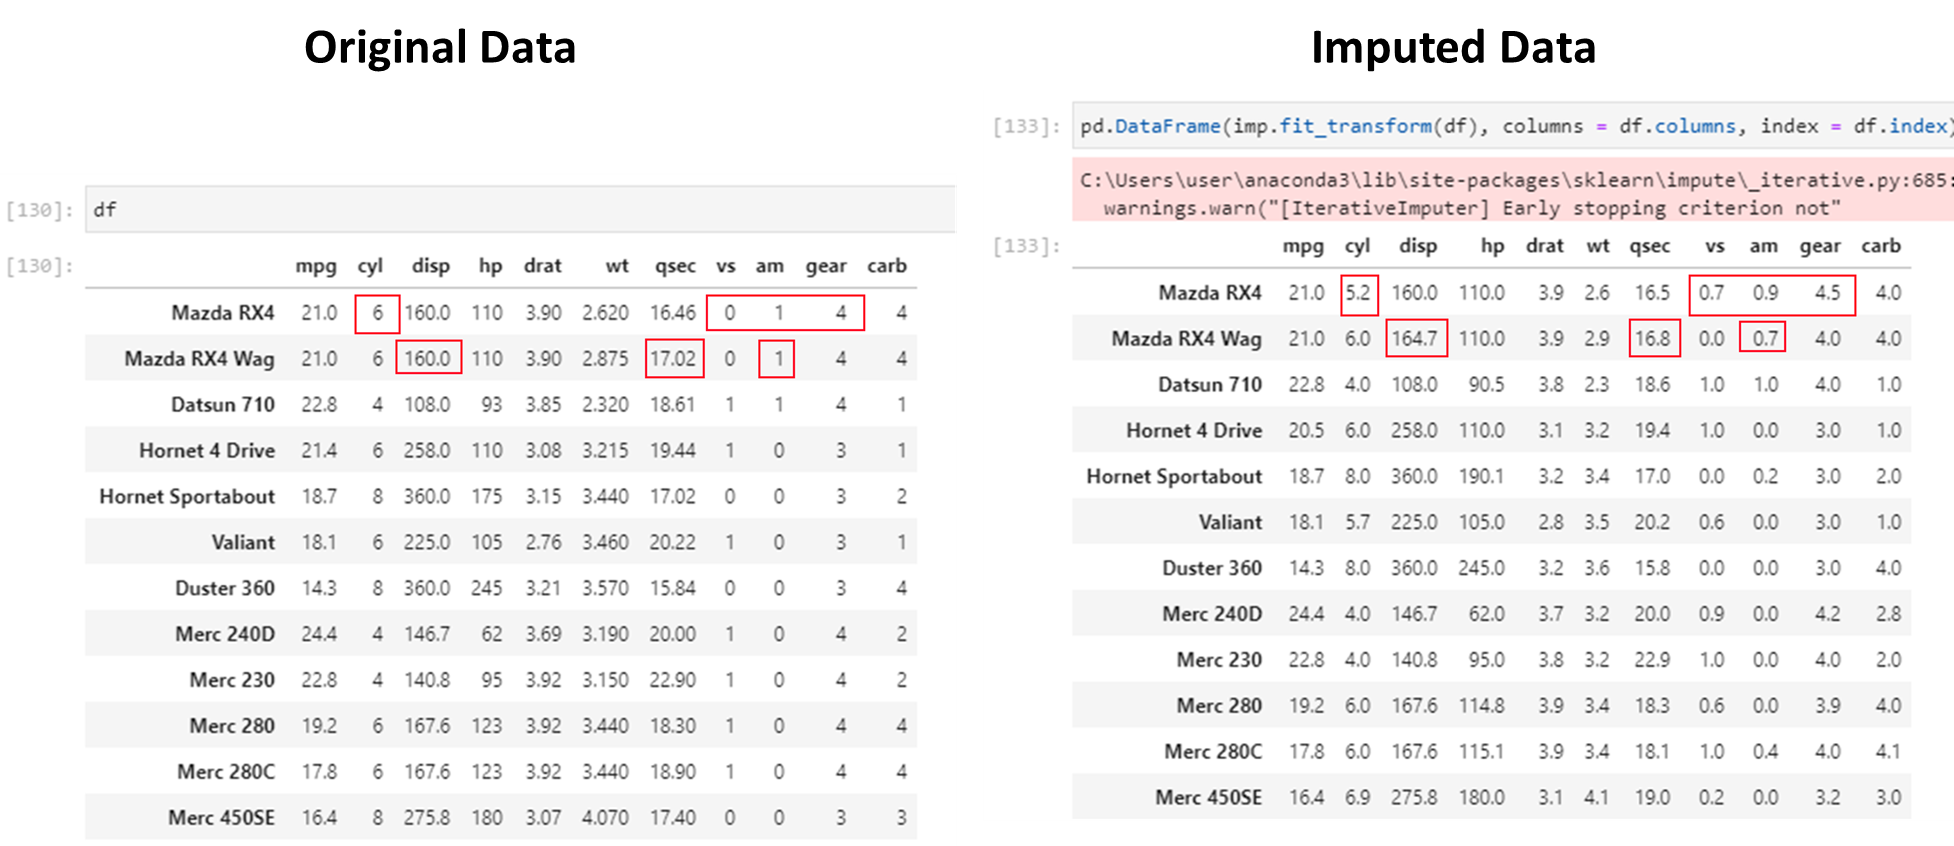

Not bad!!

## KNN Imputer
- The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach. By default, a euclidean distance metric that supports missing values, `nan_euclidean_distances`, is used to find the nearest neighbors. 
- Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. 
- The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor. 
  - When the number of available neighbors is less than n_neighbors and there are no defined distances to the training set, the training set average for that feature is used during imputation. 
  - If there is at least one neighbor with a defined distance, the weighted or unweighted average of the remaining neighbors will be used during imputation. 
  - If a feature is always missing in training, it is removed during transform.
  
_Source: https://scikit-learn.org/stable/modules/impute.html#knnimpute_ 

In [288]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
pd.DataFrame(imputer.fit_transform(df), columns = df.columns, index = df.index)

mpg  cyl    disp     hp   drat      wt   qsec   vs  \
rownames                                                                    
Mazda RX4            21.00  7.0  160.00  145.0  3.900  3.3025  16.46  0.0   
Mazda RX4 Wag        21.00  6.0  160.00  110.0  3.900  2.8750  17.95  0.5   
Datsun 710           22.80  5.0  108.00   93.0  3.850  3.3925  17.64  1.0   
Hornet 4 Drive       20.45  6.0  292.50  118.5  3.535  3.2150  19.44  1.0   
Hornet Sportabout    15.80  7.0  360.00  175.0  3.150  3.4400  17.64  0.5   
Valiant              18.10  6.0  225.00  121.0  3.140  3.4600  19.72  1.0   
Duster 360           14.30  7.0  317.90  177.5  3.210  3.5700  15.84  0.5   
Merc 240D            19.80  5.0  172.55   62.0  4.315  2.8400  20.00  1.0   
Merc 230             24.85  4.0  140.80   64.0  3.920  2.7075  22.90  1.0   
Merc 280             24.85  6.0  167.60   92.5  3.920  3.4400  18.30  1.0   
Merc 280C            17.65  6.0  167.60  123.0  3.920  3.3275  18.87  1.0   
Merc 450SE           15.80  8.0  275.80  180.0  3.070  4.0700  17.80  0.0   
Merc 450SL           17.30  8.0  275.80  180.0  3.070  3.7300  17.60  0.0   
Merc 450SLC          15.80  8.0  275.80  180.0  3.070  3.9000  18.00  0.0   
Cadillac Fleetwood   10.40  7.0  472.00  205.0  2.930  5.2500  17.98  0.0   
Lincoln Continental  10.40  8.0  460.00  215.0  3.000  5.4240  17.82  0.0   
Chrysler Imperial    14.70  7.0  440.00  230.0  3.230  5.3450  17.42  0.5   
Fiat 128             32.40  4.0  105.95   66.0  4.080  2.2000  21.40  1.0   
Honda Civic          30.40  4.0   75.70   64.0  4.930  1.6150  18.52  1.0   
Toyota Corolla       31.40  4.0   71.10   65.0  4.220  1.8350  19.90  1.0   
Toyota Corona        21.50  4.0  120.10  121.0  3.700  2.4650  20.01  1.0   
Dodge Challenger     15.50  7.0  318.00  150.0  2.760  3.5200  16.87  0.5   
AMC Javelin          15.20  8.0  304.00  150.0  3.150  3.4350  17.30  0.0   
Camaro Z28           13.30  8.0  350.00  245.0  3.730  3.8400  15.41  0.5   
Pontiac Firebird     19.20  8.0  400.00  175.0  3.140  3.8450  17.05  0.0   
Fiat X1-9            27.30  4.0   79.00   64.0  4.080  1.9350  18.90  1.0   
Porsche 914-2        26.00  4.0  120.30   64.0  4.430  2.1400  19.30  0.0   
Lotus Europa         30.40  5.0   95.10  113.0  3.770  1.5130  19.17  1.0   
Ford Pantera L       15.80  8.0  351.00  212.5  4.220  3.1700  14.50  0.0   
Ferrari Dino         19.70  6.0  145.00  175.0  3.140  3.4725  15.50  0.5   
Maserati Bora        15.05  8.0  301.00  335.0  3.540  3.3925  14.60  0.0   
Volvo 142E           29.20  4.0  121.00   64.0  4.255  2.7800  18.60  1.0   

                      am  gear  carb  
rownames                              
Mazda RX4            1.0   4.0   3.5  
Mazda RX4 Wag        1.0   4.0   4.0  
Datsun 710           0.0   4.0   1.0  
Hornet 4 Drive       0.0   3.0   2.5  
Hornet Sportabout    0.0   3.0   3.5  
Valiant              0.0   3.0   1.0  
Duster 360           0.0   3.0   4.0  
Merc 240D            0.0   4.0   1.0  
Merc 230             0.0   4.0   2.0  
Merc 280             0.0   4.0   3.5  
Merc 280C            0.0   4.0   4.0  
Merc 450SE           0.0   3.0   3.0  
Merc 450SL           0.0   3.0   3.0  
Merc 450SLC          0.0   3.0   3.0  
Cadillac Fleetwood   0.0   3.0   4.0  
Lincoln Continental  0.0   3.0   4.0  
Chrysler Imperial    0.0   3.0   4.0  
Fiat 128             0.5   4.0   1.0  
Honda Civic          1.0   4.0   2.0  
Toyota Corolla       1.0   4.0   1.0  
Toyota Corona        0.5   3.0   1.0  
Dodge Challenger     0.0   3.0   2.0  
AMC Javelin          0.0   3.0   2.0  
Camaro Z28           0.0   3.0   4.0  
Pontiac Firebird     0.0   3.0   2.0  
Fiat X1-9            1.0   3.5   1.0  
Porsche 914-2        0.5   5.0   1.5  
Lotus Europa         1.0   3.0   2.0  
Ford Pantera L       0.0   3.0   4.0  
Ferrari Dino         1.0   5.0   6.0  
Maserati Bora        0.0   5.0   8.0  
Volvo 142E           1.0   4.0   2.0

Let us compare imputed values to actual data.

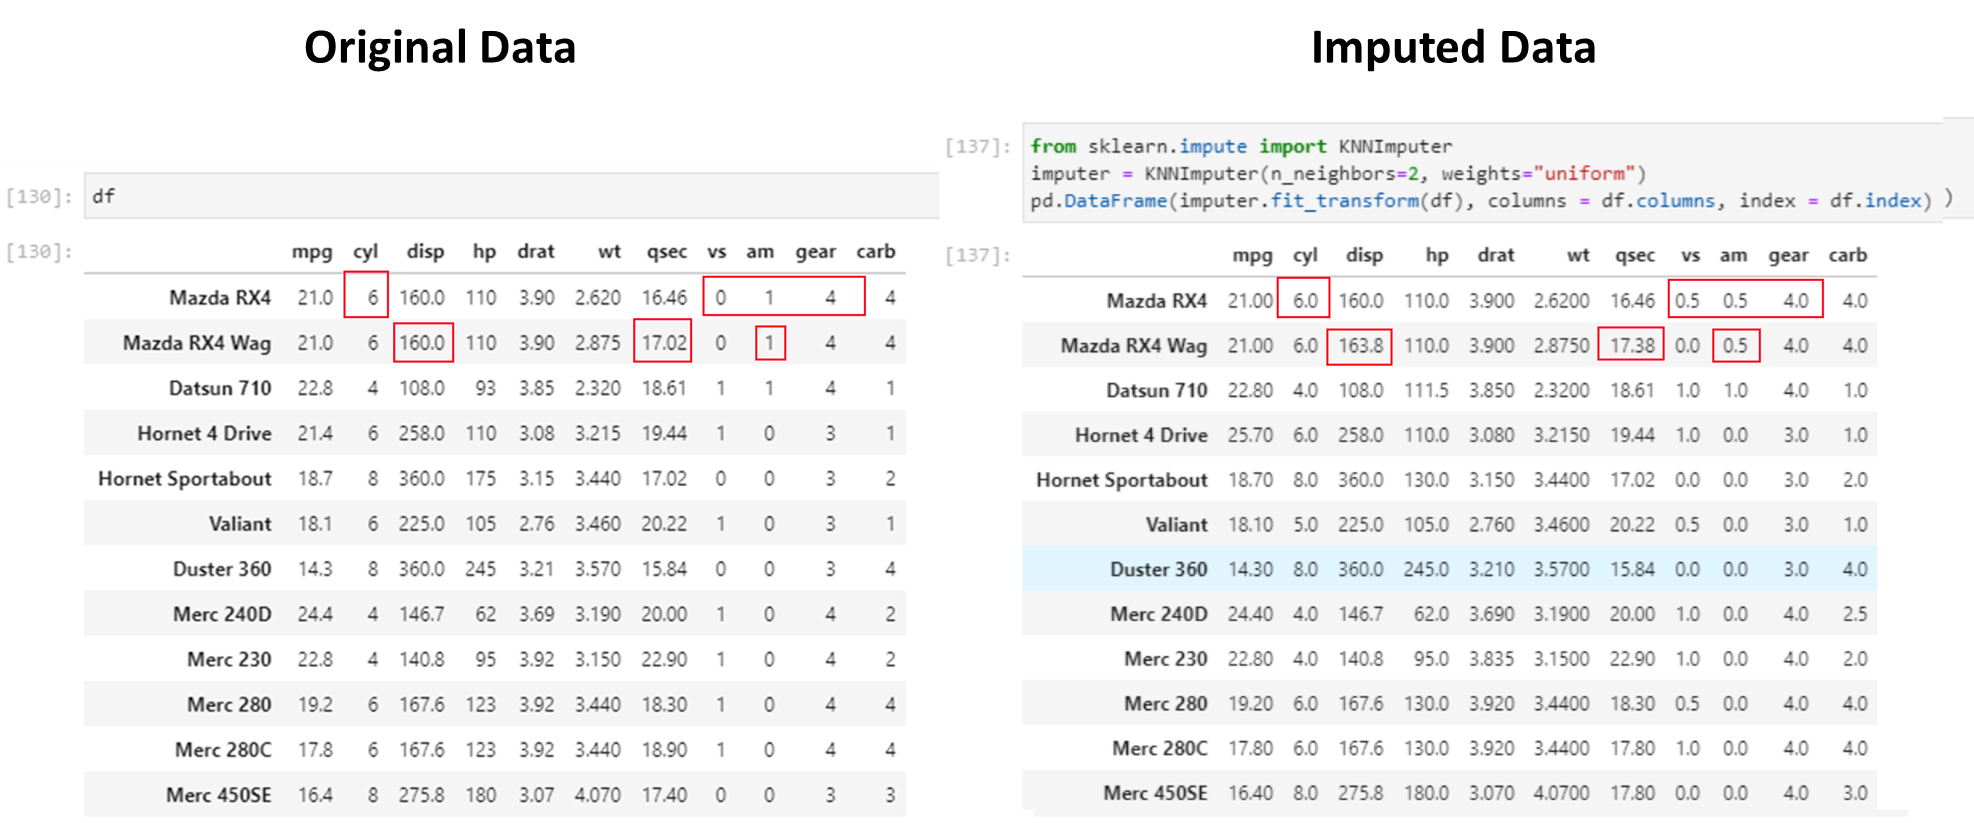

This is even better than the iterative imputer!!

## List Comprehension and Other Useful Tricks

List comprehension returns a list, and takes the following format:

> **[** function(item) **for** item **in** iterable **if** condition **]** 

In [289]:
# Create an empty dataframe

import pandas as pd

df = pd.DataFrame(columns = ['Date', 'User 1', 'User 2', 'User 3', 'User 4', 'User 5', 'User 6', 'User 7'])
df
                  

Empty DataFrame
Columns: [Date, User 1, User 2, User 3, User 4, User 5, User 6, User 7]
Index: []

In [290]:
# List all columns in a dataframe meeting a criteria

[col for col in df if col.startswith('U')]

['User 1', 'User 2', 'User 3', 'User 4', 'User 5', 'User 6', 'User 7']

In [291]:
# If condition in a single line

b = 4
a = "positive" if b >= 0 else "negative"
a

'positive'


**List comprehension**  
newlist = [expression for item in iterable if condition == True]

In [292]:
# Basic list comprehension
x = list(v**2 for v in range(4))
x

[0, 1, 4, 9]

In [293]:
# List comprehension

fruits = ["apple", "banana", "cherry", "kiwi", "mango"]

newlist = [x for x in fruits if "a" in x]

print(newlist)

['apple', 'banana', 'mango']


```python
# Subsetting a dict

samples = {k: v for k, v in samples.items() if k not in ["idx", "sentence1", "sentence2"]}
```

In [294]:
# A function to identify text in a string
def corona(text):
    corona_story_strings = ['covid', 'corona', 'sars', 'virus', 'coronavirus', 'vaccine']
    return any(x in text for x in corona_story_strings)